# Business Case: Understanding profitability in the US finantial market. 

**Mariana Castro Payns - A01706038**

Analization of historical quarterly financial statements of all US public firms listed in the New York Exchange and NASDAQ. 

## Business Questions:



### 2.1 General Questions:

By industry, what is the composition of US public firms in terms of firm size, sales performance and profitability?

> US PUBLIC FIRMS IN TERMS OF SIZE ARE COMPOSED BY TERMS LIKE MARKET VALUE AND/OR BOOK VALUE. THEY ARE CALCULATED WITH VARIABLES LIKE TOTAL ASSETS AND TOTAL LIABILITIES (BOOK VALUE) AND HISTORICAL STOCK PRICE * NUMBER OF SHARES (MARKET VALUE). IN THE OTHER HAND THE PROFITABILITY IS GIVEN BY VALUES LIKE REVENUES, EARNINGS BEFORE INTEREST AND TAXES (EBIT), VARIABLE COSTS, SALES AND ADMINISTRATIVE EXPENSES AMONG OTHERS. 

Why some firms are more profitable than others? Which factors/variables from financial statements are related to stock returns?

> THE PROFITABILITY OF A FIRM DEPENDS ON A LOT OF THINGS, EVEN THE TYPE OF INDUSTRY. THE FACTORS RELATED TO THE STOCK RETURN ARE VALUES SUCH AS SIZE OF FIRM, REVENUES, OPERATING PROFIT MARGIN, NET INCOME, INCOME TAX, FINANTIAL EXPENSES AND OTHERS. 

### 2.2 Specific Questions:

#### 2.2.1 About Descriptive Statistics

In [ ]:
# Import necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Import data sets 
df = pd.read_csv('us2022q2a.csv')
df

,firm,q,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,totalliabilities,shortdebt,longdebt,stockholderequity,adjprice,originalprice,sharesoutstanding,fiscalmonth,year,cto
0,A,2000q1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.761670,104.0000,452000.000,NaN,2000.0,1.0
1,A,2000q2,2485000.0,1261000.0,1.010000e+06,0.0,42000.000000,0.000,90000.0,7321000.000,2679000.000,512000.000,0.000,4642000.000,45.215607,73.7500,452271.967,6.0,2000.0,2.0
2,A,2000q3,2670000.0,1369000.0,1.091000e+06,0.0,28000.000000,0.000,83000.0,7827000.000,2925000.000,528000.000,0.000,4902000.000,30.003238,48.9375,453014.579,9.0,2000.0,3.0
3,A,2000q4,3372000.0,1732000.0,1.182000e+06,0.0,10000.000000,0.000,163000.0,8425000.000,3160000.000,830000.000,0.000,5265000.000,33.566841,54.7500,456366.381,12.0,2000.0,4.0
4,A,2001q1,2841000.0,1449000.0,1.113000e+06,0.0,-6000.000000,0.000,119000.0,9208000.000,3667000.000,556000.000,0.000,5541000.000,18.840347,30.7300,456769.737,3.0,2001.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324442,ZYNE,2021q3,0.0,0.0,1.021065e+04,0.0,-376.636750,-5.038,0.0,89996.170,11309.171,207.635,411.237,78686.999,4.240000,4.2400,41251.537,9.0,2021.0,3.0
324443,ZYNE,2021q4,0.0,0.0,8.836436e+03,0.0,16.937906,-4.433,0.0,81171.507,10258.173,209.068,353.694,70913.334,2.880000,2.8800,41217.537,12.0,2021.0,4.0
324444,ZYNE,2022q1,0.0,0.0,8.903915e+03,0.0,317.252110,-96.044,0.0,74381.029,9214.059,210.512,295.754,65166.970,2.050000,2.0500,42447.037,3.0,2022.0,1.0
324445,ZYNE,2022q2,0.0,0.0,9.168770e+03,0.0,-775.927860,-91.691,0.0,67006.959,9765.086,211.965,237.414,57241.873,1.140000,1.1400,43595.959,6.0,2022.0,2.0


In [ ]:
# Get main info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324447 entries, 0 to 324446
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   firm               324446 non-null  object 
 1   q                  324446 non-null  object 
 2   revenue            158614 non-null  float64
 3   cogs               158309 non-null  float64
 4   sgae               158309 non-null  float64
 5   otheropexp         158311 non-null  float64
 6   extraincome        158613 non-null  float64
 7   finexp             158614 non-null  float64
 8   incometax          158614 non-null  float64
 9   totalassets        159808 non-null  float64
 10  totalliabilities   159808 non-null  float64
 11  shortdebt          129677 non-null  float64
 12  longdebt           159595 non-null  float64
 13  stockholderequity  159740 non-null  float64
 14  adjprice           159154 non-null  float64
 15  originalprice      159234 non-null  float64
 16  sh

In [ ]:
# Define name of columns and delete the ones that we wont be using
columns = ["firm", "Name", "N", "Class", "Country of Origin", "Type of Asset", "Sector NAICS level 1", "Exchange / Src", "Sector Economatica", "Sector NAICS last available", "partind"]
firms = pd.read_csv("usfirms2022.csv", names=columns)
firms = firms.drop(["N", "Class", "Country of Origin", "Type of Asset", "Exchange / Src", "Sector Economatica", "Sector NAICS last available", "partind"], axis = 1)
firms

,firm,Name,Sector NAICS level 1
0,Ticker,Name,Sector NAICS\nlevel 1
1,FLWS,1 800 Flowers Com Inc,Retail Trade
2,TXG,"10x Genomics, Inc",Manufacturing
3,GOED,1847 Goedeker Inc,Retail Trade
4,ONEM,"1life Healthcare, Inc",Health Care and Social Assistance
...,...,...,...
3604,ZUO,"Zuora, Inc",Information
3605,ZWS,Zurn Elkay Water Solutions Corp,Manufacturing
3606,ZY,Zymergen Inc,"Professional, Scientific, and Technical Services"
3607,ZYNE,"Zynerba Pharmaceuticals, Inc",Manufacturing


In [ ]:
# Merge data sets to get all the information we need
df = df.merge(firms, how = 'left', on = 'firm')

In [ ]:
# Define frequency of period (quarter for this case)
df['q'] = pd.PeriodIndex(df['q'], freq = "Q")
df

,firm,q,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,...,longdebt,stockholderequity,adjprice,originalprice,sharesoutstanding,fiscalmonth,year,cto,Name,Sector NAICS level 1
0,A,2000Q1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,63.761670,104.0000,452000.000,NaN,2000.0,1.0,"Agilent Technologies, Inc",Manufacturing
1,A,2000Q2,2485000.0,1261000.0,1.010000e+06,0.0,42000.000000,0.000,90000.0,7321000.000,...,0.000,4642000.000,45.215607,73.7500,452271.967,6.0,2000.0,2.0,"Agilent Technologies, Inc",Manufacturing
2,A,2000Q3,2670000.0,1369000.0,1.091000e+06,0.0,28000.000000,0.000,83000.0,7827000.000,...,0.000,4902000.000,30.003238,48.9375,453014.579,9.0,2000.0,3.0,"Agilent Technologies, Inc",Manufacturing
3,A,2000Q4,3372000.0,1732000.0,1.182000e+06,0.0,10000.000000,0.000,163000.0,8425000.000,...,0.000,5265000.000,33.566841,54.7500,456366.381,12.0,2000.0,4.0,"Agilent Technologies, Inc",Manufacturing
4,A,2001Q1,2841000.0,1449000.0,1.113000e+06,0.0,-6000.000000,0.000,119000.0,9208000.000,...,0.000,5541000.000,18.840347,30.7300,456769.737,3.0,2001.0,1.0,"Agilent Technologies, Inc",Manufacturing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324442,ZYNE,2021Q3,0.0,0.0,1.021065e+04,0.0,-376.636750,-5.038,0.0,89996.170,...,411.237,78686.999,4.240000,4.2400,41251.537,9.0,2021.0,3.0,"Zynerba Pharmaceuticals, Inc",Manufacturing
324443,ZYNE,2021Q4,0.0,0.0,8.836436e+03,0.0,16.937906,-4.433,0.0,81171.507,...,353.694,70913.334,2.880000,2.8800,41217.537,12.0,2021.0,4.0,"Zynerba Pharmaceuticals, Inc",Manufacturing
324444,ZYNE,2022Q1,0.0,0.0,8.903915e+03,0.0,317.252110,-96.044,0.0,74381.029,...,295.754,65166.970,2.050000,2.0500,42447.037,3.0,2022.0,1.0,"Zynerba Pharmaceuticals, Inc",Manufacturing
324445,ZYNE,2022Q2,0.0,0.0,9.168770e+03,0.0,-775.927860,-91.691,0.0,67006.959,...,237.414,57241.873,1.140000,1.1400,43595.959,6.0,2022.0,2.0,"Zynerba Pharmaceuticals, Inc",Manufacturing


In [ ]:
# Stablish firm as index with quartil frequency
df.set_index(['firm', 'q'], inplace=True)
df

revenue       cogs          sgae  otheropexp   extraincome  \
firm q                                                                      
A    2000Q1        NaN        NaN           NaN         NaN           NaN   
     2000Q2  2485000.0  1261000.0  1.010000e+06         0.0  42000.000000   
     2000Q3  2670000.0  1369000.0  1.091000e+06         0.0  28000.000000   
     2000Q4  3372000.0  1732000.0  1.182000e+06         0.0  10000.000000   
     2001Q1  2841000.0  1449000.0  1.113000e+06         0.0  -6000.000000   
...                ...        ...           ...         ...           ...   
ZYNE 2021Q3        0.0        0.0  1.021065e+04         0.0   -376.636750   
     2021Q4        0.0        0.0  8.836436e+03         0.0     16.937906   
     2022Q1        0.0        0.0  8.903915e+03         0.0    317.252110   
     2022Q2        0.0        0.0  9.168770e+03         0.0   -775.927860   
NaN  NaN           NaN        NaN           NaN         NaN           NaN   

             finexp  incometax  totalassets  totalliabilities   shortdebt  \
firm q                                                                      
A    2000Q1     NaN        NaN          NaN               NaN         NaN   
     2000Q2   0.000    90000.0  7321000.000       2679000.000  512000.000   
     2000Q3   0.000    83000.0  7827000.000       2925000.000  528000.000   
     2000Q4   0.000   163000.0  8425000.000       3160000.000  830000.000   
     2001Q1   0.000   119000.0  9208000.000       3667000.000  556000.000   
...             ...        ...          ...               ...         ...   
ZYNE 2021Q3  -5.038        0.0    89996.170         11309.171     207.635   
     2021Q4  -4.433        0.0    81171.507         10258.173     209.068   
     2022Q1 -96.044        0.0    74381.029          9214.059     210.512   
     2022Q2 -91.691        0.0    67006.959          9765.086     211.965   
NaN  NaN        NaN        NaN          NaN               NaN         NaN   

             longdebt  stockholderequity   adjprice  originalprice  \
firm q                                                               
A    2000Q1       NaN                NaN  63.761670       104.0000   
     2000Q2     0.000        4642000.000  45.215607        73.7500   
     2000Q3     0.000        4902000.000  30.003238        48.9375   
     2000Q4     0.000        5265000.000  33.566841        54.7500   
     2001Q1     0.000        5541000.000  18.840347        30.7300   
...               ...                ...        ...            ...   
ZYNE 2021Q3   411.237          78686.999   4.240000         4.2400   
     2021Q4   353.694          70913.334   2.880000         2.8800   
     2022Q1   295.754          65166.970   2.050000         2.0500   
     2022Q2   237.414          57241.873   1.140000         1.1400   
NaN  NaN          NaN                NaN        NaN            NaN   

             sharesoutstanding  fiscalmonth    year  cto  \
firm q                                                     
A    2000Q1         452000.000          NaN  2000.0  1.0   
     2000Q2         452271.967          6.0  2000.0  2.0   
     2000Q3         453014.579          9.0  2000.0  3.0   
     2000Q4         456366.381         12.0  2000.0  4.0   
     2001Q1         456769.737          3.0  2001.0  1.0   
...                        ...          ...     ...  ...   
ZYNE 2021Q3          41251.537          9.0  2021.0  3.0   
     2021Q4          41217.537         12.0  2021.0  4.0   
     2022Q1          42447.037          3.0  2022.0  1.0   
     2022Q2          43595.959          6.0  2022.0  2.0   
NaN  NaN                   NaN          NaN     NaN  NaN   

                                     Name Sector NAICS level 1  
firm q                                                          
A    2000Q1     Agilent Technologies, Inc        Manufacturing  
     2000Q2     Agilent Technologies, Inc        Manufacturing  
     2000Q3     Agilent Technologies, Inc        Manufactur

##### 2.2.1.1 Considering the most recent financial quarter of the dataset
##### 1. Show how many firms by industry there are in the sample:

In [ ]:
# Get data from commercial industry
commercial = df.loc[(df["Sector NAICS level 1"] == "Wholesale Trade") | (df["Sector NAICS level 1"] == "Retail Trade")]
commercial

revenue      cogs     sgae  otheropexp  extraincome  finexp  \
firm q                                                                      
AAP  2000Q1       NaN       NaN      NaN         NaN          NaN     NaN   
     2000Q2       NaN       NaN      NaN         NaN          NaN     NaN   
     2000Q3       NaN       NaN      NaN         NaN          NaN     NaN   
     2000Q4       NaN       NaN      NaN         NaN          NaN     NaN   
     2001Q1       NaN       NaN      NaN         NaN          NaN     NaN   
...               ...       ...      ...         ...          ...     ...   
ZUMZ 2021Q2  279069.0  175900.0  68889.0         0.0        254.0  -975.0   
     2021Q3  268666.0  163701.0  73011.0         0.0       -151.0  -965.0   
     2021Q4  289455.0  174791.0  74822.0         0.0        468.0  -893.0   
     2022Q1  346677.0  212744.0  82198.0         0.0      -1462.0  -759.0   
     2022Q2  220686.0  148312.0  71877.0         0.0        172.0  -492.0   

             incometax  totalassets  totalliabilities  shortdebt  longdebt  \
firm q                                                                       
AAP  2000Q1        NaN          NaN               NaN        NaN       NaN   
     2000Q2        NaN          NaN               NaN        NaN       NaN   
     2000Q3        NaN          NaN               NaN        NaN       NaN   
     2000Q4        NaN          NaN               NaN        NaN       NaN   
     2001Q1        NaN          NaN               NaN        NaN       NaN   
...                ...          ...               ...        ...       ...   
ZUMZ 2021Q2     9124.0    1017804.0          436023.0    67433.0  238553.0   
     2021Q3     8770.0    1030742.0          436446.0    65844.0  223043.0   
     2021Q4    10501.0     978189.0          446447.0    64389.0  220524.0   
     2022Q1    12828.0     862012.0          393694.0    63577.0  204309.0   
     2022Q2     1558.0     768114.0          391217.0    69327.0  207953.0   

             stockholderequity  adjprice  originalprice  sharesoutstanding  \
firm q                                                                       
AAP  2000Q1                NaN       NaN            NaN                NaN   
     2000Q2                NaN       NaN            NaN                NaN   
     2000Q3                NaN       NaN            NaN                NaN   
     2000Q4                NaN       NaN            NaN                NaN   
     2001Q1                NaN       NaN            NaN                NaN   
...                        ...       ...            ...                ...   
ZUMZ 2021Q2           581781.0     48.99          48.99          25781.021   
     2021Q3           594296.0     39.76          39.76          25164.434   
     2021Q4           531742.0     47.99          47.99          22977.833   
     2022Q1           468318.0     38.21          38.21          19922.279   
     2022Q2           376897.0     26.00          26.00          19459.555   

             fiscalmonth    year  cto                     Name  \
firm q                                                           
AAP  2000Q1          NaN  2000.0  1.0  Advance Auto Parts, Inc   
     2000Q2          NaN  2000.0  2.0  Advance Auto Parts, Inc   
     2000Q3          NaN  2000.0  3.0  Advance Auto Parts, Inc   
     2000Q4          NaN  2000.0  4.0  Advance Auto Parts, Inc   
     2001Q1          NaN  2001.0  1.0  Advance Auto Parts, Inc   
...                  ...     ...  ...                      ...   
ZUMZ 2021Q2          3.0  2021.0  2.0               Zumiez Inc   
     2021Q3          6.0  2021.0  3.0               Zumiez Inc   
     2021Q4          9.0  2021.0  4.0               Zumiez Inc   
     2022Q1         12.0  2022.0  1.0               Zumiez Inc   
     2022Q2          3.0  2022.0  2.0               Zumiez Inc   

            Sector NAICS level 1  
firm q                            
AAP  2000Q1         Retail Trade  
     2000Q2       

In [ ]:
# Get data from services industry
services = df.loc[(df["Sector NAICS level 1"] == "Accommodation and Food Services") | (df["Sector NAICS level 1"] == "Administrative and Support and Waste Managment and Remedation Services") | (df["Sector NAICS level 1"] == "Arts, Entertainment, and Recreation") | (df["Sector NAICS level 1"] == "Educational Services") | (df["Sector NAICS level 1"] == "Health Care and Social Assistance") | (df["Sector NAICS level 1"] == "Information") | (df["Sector NAICS level 1"] == "Other Services (except Public Administration)") | (df["Sector NAICS level 1"] == "Profession, Scientific and Technical Services") | (df["Sector NAICS level 1"] == "Transportation and Warehousing")]
services

revenue     cogs       sgae  otheropexp  extraincome   finexp  \
firm q                                                                         
AAL  2000Q1  4577000.0      0.0  4365000.0         0.0      37000.0  49000.0   
     2000Q2  5011000.0      0.0  4494000.0         0.0      50000.0  45000.0   
     2000Q3  5256000.0      0.0  4684000.0         0.0     -15000.0  41000.0   
     2000Q4  4859000.0      0.0  4779000.0         0.0      30000.0  27000.0   
     2001Q1  4760000.0      0.0  4743000.0         0.0     -36000.0  38000.0   
...                ...      ...        ...         ...          ...      ...   
ZVO  2021Q2    69186.0  41229.0    30105.0      2341.0        232.0      0.0   
     2021Q3    62226.0  36936.0    30081.0       300.0        -69.0      0.0   
     2021Q4    54762.0  37543.0    26575.0     14335.0         40.0      0.0   
     2022Q1    61633.0  39829.0    29036.0         0.0       -127.0      0.0   
     2022Q2    51380.0  34995.0    26108.0     -8882.0      -3824.0      0.0   

             incometax  totalassets  totalliabilities  shortdebt   longdebt  \
firm q                                                                        
AAL  2000Q1    68000.0   24314000.0        17892000.0   472000.0  5544000.0   
     2000Q2   201000.0   25473000.0        18699000.0   742000.0  5395000.0   
     2000Q3   203000.0   25899000.0        18806000.0   768000.0  5198000.0   
     2000Q4    36000.0   26213000.0        19037000.0   796000.0  5474000.0   
     2001Q1   -14000.0   26534000.0        19301000.0   696000.0  5877000.0   
...                ...          ...               ...        ...        ...   
ZVO  2021Q2     -224.0     153895.0          106787.0        0.0        0.0   
     2021Q3       59.0     157775.0          114911.0        0.0        0.0   
     2021Q4      -47.0     149034.0          129028.0        0.0        0.0   
     2022Q1       78.0     148751.0          137484.0        0.0        0.0   
     2022Q2        8.0      85433.0           78828.0        0.0        0.0   

             stockholderequity  adjprice  originalprice  sharesoutstanding  \
firm q                                                                       
AAL  2000Q1          6422000.0       NaN            NaN         148583.186   
     2000Q2          6774000.0       NaN            NaN         149684.717   
     2000Q3          7093000.0       NaN            NaN         149957.759   
     2000Q4          7176000.0       NaN            NaN         150689.302   
     2001Q1          7233000.0       NaN            NaN         153619.329   
...                        ...       ...            ...                ...   
ZVO  2021Q2            47108.0    2.5900         2.5900          33328.550   
     2021Q3            42864.0    2.3900         2.3900          33417.762   
     2021Q4            20006.0    1.2700         1.2700          33459.695   
     2022Q1            11267.0    0.8201         0.8201          34054.879   
     2022Q2             6605.0    0.9701         0.9701          34095.968   

             fiscalmonth    year  cto                         Name  \
firm q                                                               
AAL  2000Q1          3.0  2000.0  1.0  American Airlines Group Inc   
     2000Q2          6.0  2000.0  2.0  American Airlines Group Inc   
     2000Q3          9.0  2000.0  3.0  American Airlines Group Inc   
     2000Q4         12.0  2000.0  4.0  American Airlines Group Inc   
     2001Q1          3.0  2001.0  1.0  American Airlines Group Inc   
...                  ...     ...  ...                          ...   
ZVO  2021Q2          6.0  2021.0  2.0                    Zovio Inc   
     2021Q3          9.0  2021.0  3.0                    Zovio Inc   
     2021Q4         12.0  2021.0  4.0                    Zovio Inc   
     2022Q1          3.0  2022.0  1.0                    Zovio Inc   
     2022Q2          6.0  2022.0  2.0                    Zovio Inc   

                    

In [ ]:
# Get finantial services industry data
finantial_services = df.loc[(df["Sector NAICS level 1"] == "Finance and Insurance") | (df["Sector NAICS level 1"] == "Real Estate and Rental and Leasing")]
finantial_services

revenue     cogs  sgae  otheropexp  extraincome  finexp  \
firm q                                                                  
AAIC 2000Q1       NaN      NaN   NaN         NaN          NaN     NaN   
     2000Q2       NaN      NaN   NaN         NaN          NaN     NaN   
     2000Q3       NaN      NaN   NaN         NaN          NaN     NaN   
     2000Q4       NaN      NaN   NaN         NaN          NaN     NaN   
     2001Q1       NaN      NaN   NaN         NaN          NaN     NaN   
...               ...      ...   ...         ...          ...     ...   
ZION 2021Q2  570000.0  15000.0   0.0         0.0    -100000.0     0.0   
     2021Q3  569000.0  14000.0   0.0         0.0    -244000.0     0.0   
     2021Q4  566000.0  13000.0   0.0         0.0    -284000.0     0.0   
     2022Q1  555000.0  11000.0   0.0         0.0    -289000.0     0.0   
     2022Q2  608000.0  15000.0   0.0         0.0    -333000.0     0.0   

             incometax  totalassets  totalliabilities  shortdebt   longdebt  \
firm q                                                                        
AAIC 2000Q1        NaN          NaN               NaN        NaN        NaN   
     2000Q2        NaN          NaN               NaN        NaN        NaN   
     2000Q3        NaN          NaN               NaN        NaN        NaN   
     2000Q4        NaN          NaN               NaN        NaN        NaN   
     2001Q1        NaN          NaN               NaN        NaN        NaN   
...                ...          ...               ...        ...        ...   
ZION 2021Q2   101000.0   87208000.0        79175000.0        NaN  1308000.0   
     2021Q3    71000.0   88306000.0        80532000.0        NaN  1020000.0   
     2021Q4    56000.0   93200000.0        85737000.0        NaN  1012000.0   
     2022Q1    52000.0   91126000.0        84832000.0        NaN   689000.0   
     2022Q2    57000.0   87784000.0        82152000.0        NaN   671000.0   

             stockholderequity   adjprice  originalprice  sharesoutstanding  \
firm q                                                                        
AAIC 2000Q1                NaN  36.840768        10.8750                NaN   
     2000Q2                NaN  27.524712         8.1250                NaN   
     2000Q3                NaN  31.547554         9.3125                NaN   
     2000Q4                NaN  22.231498         6.5625                NaN   
     2001Q1                NaN  18.564359         5.4800                NaN   
...                        ...        ...            ...                ...   
ZION 2021Q2          8033000.0  51.206987        52.8600         163815.613   
     2021Q3          7774000.0  60.369290        61.8900         162070.463   
     2021Q4          7463000.0  61.968365        63.1600         156463.463   
     2022Q1          6294000.0  64.653705        65.5600         151574.325   
     2022Q2          5632000.0  50.546228        50.9000         151358.748   

             fiscalmonth    year  cto  \
firm q                                  
AAIC 2000Q1          NaN  2000.0  1.0   
     2000Q2          NaN  2000.0  2.0   
     2000Q3          NaN  2000.0  3.0   
     2000Q4          NaN  2000.0  4.0   
     2001Q1          NaN  2001.0  1.0   
...                  ...     ...  ...   
ZION 2021Q2          6.0  2021.0  2.0   
     2021Q3          9.0  2021.0  3.0   
     2021Q4         12.0  2021.0  4.0   
     2022Q1          3.0  2022.0  1.0   
     2022Q2          6.0  2022.0  2.0   

                                                   Name   Sector NAICS level 1  
firm q                                                                          
AAIC 2000Q1             Arlington Asset Investment Corp  Finance and Insurance  
     2000Q2             Arlington Asset Investment Corp  Finance and Insurance  
     2000Q3             Arlington Asset Investment Corp  Finance and Insurance  
     2000Q4             Arlington Asset Investment Corp  Finance and 

In [ ]:
# Get manufacturing industry data
manufacturing = df.loc[(df["Sector NAICS level 1"] == "Manufacturing")]
manufacturing

revenue       cogs          sgae  otheropexp   extraincome  \
firm q                                                                      
A    2000Q1        NaN        NaN           NaN         NaN           NaN   
     2000Q2  2485000.0  1261000.0  1.010000e+06         0.0  42000.000000   
     2000Q3  2670000.0  1369000.0  1.091000e+06         0.0  28000.000000   
     2000Q4  3372000.0  1732000.0  1.182000e+06         0.0  10000.000000   
     2001Q1  2841000.0  1449000.0  1.113000e+06         0.0  -6000.000000   
...                ...        ...           ...         ...           ...   
ZYNE 2021Q2        0.0        0.0  9.838494e+03         0.0   -117.528220   
     2021Q3        0.0        0.0  1.021065e+04         0.0   -376.636750   
     2021Q4        0.0        0.0  8.836436e+03         0.0     16.937906   
     2022Q1        0.0        0.0  8.903915e+03         0.0    317.252110   
     2022Q2        0.0        0.0  9.168770e+03         0.0   -775.927860   

             finexp  incometax  totalassets  totalliabilities   shortdebt  \
firm q                                                                      
A    2000Q1     NaN        NaN          NaN               NaN         NaN   
     2000Q2   0.000    90000.0  7321000.000       2679000.000  512000.000   
     2000Q3   0.000    83000.0  7827000.000       2925000.000  528000.000   
     2000Q4   0.000   163000.0  8425000.000       3160000.000  830000.000   
     2001Q1   0.000   119000.0  9208000.000       3667000.000  556000.000   
...             ...        ...          ...               ...         ...   
ZYNE 2021Q2  -5.943        0.0    98195.904         10496.647     206.211   
     2021Q3  -5.038        0.0    89996.170         11309.171     207.635   
     2021Q4  -4.433        0.0    81171.507         10258.173     209.068   
     2022Q1 -96.044        0.0    74381.029          9214.059     210.512   
     2022Q2 -91.691        0.0    67006.959          9765.086     211.965   

             longdebt  stockholderequity   adjprice  originalprice  \
firm q                                                               
A    2000Q1       NaN                NaN  63.761670       104.0000   
     2000Q2     0.000        4642000.000  45.215607        73.7500   
     2000Q3     0.000        4902000.000  30.003238        48.9375   
     2000Q4     0.000        5265000.000  33.566841        54.7500   
     2001Q1     0.000        5541000.000  18.840347        30.7300   
...               ...                ...        ...            ...   
ZYNE 2021Q2   468.385          87699.257   5.290000         5.2900   
     2021Q3   411.237          78686.999   4.240000         4.2400   
     2021Q4   353.694          70913.334   2.880000         2.8800   
     2022Q1   295.754          65166.970   2.050000         2.0500   
     2022Q2   237.414          57241.873   1.140000         1.1400   

             sharesoutstanding  fiscalmonth    year  cto  \
firm q                                                     
A    2000Q1         452000.000          NaN  2000.0  1.0   
     2000Q2         452271.967          6.0  2000.0  2.0   
     2000Q3         453014.579          9.0  2000.0  3.0   
     2000Q4         456366.381         12.0  2000.0  4.0   
     2001Q1         456769.737          3.0  2001.0  1.0   
...                        ...          ...     ...  ...   
ZYNE 2021Q2          41251.537          6.0  2021.0  2.0   
     2021Q3          41251.537          9.0  2021.0  3.0   
     2021Q4          41217.537         12.0  2021.0  4.0   
     2022Q1          42447.037          3.0  2022.0  1.0   
     2022Q2          43595.959          6.0  2022.0  2.0   

                                     Name Sector NAICS level 1  
firm q                                                          
A    2000Q1     Agilent Technologies, Inc        Manufacturing  
     2000Q2     Agilent Technologies, Inc        Manufacturing  
     2000Q3     Agilent Technologies, Inc        Manufactur

In [ ]:
# Group by firm and get the sum to get how many firms
c_firms = commercial.groupby(["firm"]).sum()
s_firms = services.groupby(["firm"]).sum()
f_firms = finantial_services.groupby(["firm"]).sum()
m_firms = manufacturing.groupby(["firm"]).sum()

In [ ]:
# Print results
print("The Commercial Industry has a total of firms: ", c_firms.shape)
print("The Services Industry has a total of firms: ", s_firms.shape)
print("The Finantial Services Industry has a total of firms: ", f_firms.shape)
print("The Manifacturing Industry has a total of firms: ", m_firms.shape)

The Commercial Industry has a total of firms:  (231, 18)
The Services Industry has a total of firms:  (514, 18)
The Finantial Services Industry has a total of firms:  (769, 18)
The Manifacturing Industry has a total of firms:  (1565, 18)


> THIS MEANS THE FIRMS DEPEND ON THE TYPE OF INDUSTRY, EVERY INDUSTRY HAS A DIFFERENT NUMBER OF FIRMS. COMMERCIAL INDUSTRY HAS A TOTAL OF 231 FIRMS; THE SERVICES INDUSTRY 514 FIRMS; THE FINANCIAL SERVICES 769 FIRMS AND THE MANUFACTURING INDUSTRY 1565 FIRMS. MANUFACTURING BEING THE ONE WITH MORE FIRMS

##### 2. For each industry (and for all industries), what can you say about the typical firm size in terms of market value and book value? How much these variables change within each industry? How firm size (in market value) is distributed?

In [ ]:
# Get Market Value
df["Market Value"] = df["originalprice"] * df["sharesoutstanding"]
df

revenue       cogs          sgae  otheropexp   extraincome  \
firm q                                                                      
A    2000Q1        NaN        NaN           NaN         NaN           NaN   
     2000Q2  2485000.0  1261000.0  1.010000e+06         0.0  42000.000000   
     2000Q3  2670000.0  1369000.0  1.091000e+06         0.0  28000.000000   
     2000Q4  3372000.0  1732000.0  1.182000e+06         0.0  10000.000000   
     2001Q1  2841000.0  1449000.0  1.113000e+06         0.0  -6000.000000   
...                ...        ...           ...         ...           ...   
ZYNE 2021Q3        0.0        0.0  1.021065e+04         0.0   -376.636750   
     2021Q4        0.0        0.0  8.836436e+03         0.0     16.937906   
     2022Q1        0.0        0.0  8.903915e+03         0.0    317.252110   
     2022Q2        0.0        0.0  9.168770e+03         0.0   -775.927860   
NaN  NaN           NaN        NaN           NaN         NaN           NaN   

             finexp  incometax  totalassets  totalliabilities   shortdebt  \
firm q                                                                      
A    2000Q1     NaN        NaN          NaN               NaN         NaN   
     2000Q2   0.000    90000.0  7321000.000       2679000.000  512000.000   
     2000Q3   0.000    83000.0  7827000.000       2925000.000  528000.000   
     2000Q4   0.000   163000.0  8425000.000       3160000.000  830000.000   
     2001Q1   0.000   119000.0  9208000.000       3667000.000  556000.000   
...             ...        ...          ...               ...         ...   
ZYNE 2021Q3  -5.038        0.0    89996.170         11309.171     207.635   
     2021Q4  -4.433        0.0    81171.507         10258.173     209.068   
     2022Q1 -96.044        0.0    74381.029          9214.059     210.512   
     2022Q2 -91.691        0.0    67006.959          9765.086     211.965   
NaN  NaN        NaN        NaN          NaN               NaN         NaN   

             ...  stockholderequity   adjprice  originalprice  \
firm q       ...                                                
A    2000Q1  ...                NaN  63.761670       104.0000   
     2000Q2  ...        4642000.000  45.215607        73.7500   
     2000Q3  ...        4902000.000  30.003238        48.9375   
     2000Q4  ...        5265000.000  33.566841        54.7500   
     2001Q1  ...        5541000.000  18.840347        30.7300   
...          ...                ...        ...            ...   
ZYNE 2021Q3  ...          78686.999   4.240000         4.2400   
     2021Q4  ...          70913.334   2.880000         2.8800   
     2022Q1  ...          65166.970   2.050000         2.0500   
     2022Q2  ...          57241.873   1.140000         1.1400   
NaN  NaN     ...                NaN        NaN            NaN   

             sharesoutstanding  fiscalmonth    year  cto  \
firm q                                                     
A    2000Q1         452000.000          NaN  2000.0  1.0   
     2000Q2         452271.967          6.0  2000.0  2.0   
     2000Q3         453014.579          9.0  2000.0  3.0   
     2000Q4         456366.381         12.0  2000.0  4.0   
     2001Q1         456769.737          3.0  2001.0  1.0   
...                        ...          ...     ...  ...   
ZYNE 2021Q3          41251.537          9.0  2021.0  3.0   
     2021Q4          41217.537         12.0  2021.0  4.0   
     2022Q1          42447.037          3.0  2022.0  1.0   
     2022Q2          43595.959          6.0  2022.0  2.0   
NaN  NaN                   NaN          NaN     NaN  NaN   

                                     Name Sector NAICS level 1  Market Value  
firm q                                                                        
A    2000Q1     Agilent Technologies, Inc        Manufacturing  4.700800e+07  
     2000Q2     Agilent Technologies, Inc        Manufacturing  3.335506e+07  
     2000Q3     Agilent Technologies, Inc        Manufacturing  2.21

In [ ]:
mv = df["Market Value"].median()
print("Market Value of All Industries: ", mv)

Market Value of All Industries:  1576864.41918


In [ ]:
# Get Market Value of Commercial industry
commercial = df.loc[(df["Sector NAICS level 1"] == "Wholesale Trade") | (df["Sector NAICS level 1"] == "Retail Trade")]
mv_c = commercial["Market Value"].median()
print("Market Value of Commercial industry: ", mv_c)

Market Value of Commercial industry:  2083817.9707199999


In [ ]:
# Get Market Value of services industry
services = df.loc[(df["Sector NAICS level 1"] == "Accommodation and Food Services") | (df["Sector NAICS level 1"] == "Administrative and Support and Waste Managment and Remedation Services") | (df["Sector NAICS level 1"] == "Arts, Entertainment, and Recreation") | (df["Sector NAICS level 1"] == "Educational Services") | (df["Sector NAICS level 1"] == "Health Care and Social Assistance") | (df["Sector NAICS level 1"] == "Information") | (df["Sector NAICS level 1"] == "Other Services (except Public Administration)") | (df["Sector NAICS level 1"] == "Profession, Scientific and Technical Services") | (df["Sector NAICS level 1"] == "Transportation and Warehousing")]
mv_s = services["Market Value"].median()
print("Market Value of Services industry: ", mv_s)

Market Value of Services industry:  2184463.5194800003


In [ ]:
# Get Market Value of finantial services industry
finantial_services = df.loc[(df["Sector NAICS level 1"] == "Finance and Insurance") | (df["Sector NAICS level 1"] == "Real Estate and Rental and Leasing")]
mv_f = finantial_services["Market Value"].median()
print("Market Value of Finantial Services industry: ", mv_f)

Market Value of Finantial Services industry:  1563695.9379000003


In [ ]:
# Get Market Value of Manufacturing industry
manufacturing = df.loc[(df["Sector NAICS level 1"] == "Manufacturing")]
mv_m = manufacturing["Market Value"].median()
print("Market Value of Manufacturing industry: ", mv_m)

Market Value of Manufacturing industry:  1190025.10997


In [ ]:
# Get Book Value
df["Book Value"] = df["totalassets"] - df["totalliabilities"]
df

revenue       cogs          sgae  otheropexp   extraincome  \
firm q                                                                      
A    2000Q1        NaN        NaN           NaN         NaN           NaN   
     2000Q2  2485000.0  1261000.0  1.010000e+06         0.0  42000.000000   
     2000Q3  2670000.0  1369000.0  1.091000e+06         0.0  28000.000000   
     2000Q4  3372000.0  1732000.0  1.182000e+06         0.0  10000.000000   
     2001Q1  2841000.0  1449000.0  1.113000e+06         0.0  -6000.000000   
...                ...        ...           ...         ...           ...   
ZYNE 2021Q3        0.0        0.0  1.021065e+04         0.0   -376.636750   
     2021Q4        0.0        0.0  8.836436e+03         0.0     16.937906   
     2022Q1        0.0        0.0  8.903915e+03         0.0    317.252110   
     2022Q2        0.0        0.0  9.168770e+03         0.0   -775.927860   
NaN  NaN           NaN        NaN           NaN         NaN           NaN   

             finexp  incometax  totalassets  totalliabilities   shortdebt  \
firm q                                                                      
A    2000Q1     NaN        NaN          NaN               NaN         NaN   
     2000Q2   0.000    90000.0  7321000.000       2679000.000  512000.000   
     2000Q3   0.000    83000.0  7827000.000       2925000.000  528000.000   
     2000Q4   0.000   163000.0  8425000.000       3160000.000  830000.000   
     2001Q1   0.000   119000.0  9208000.000       3667000.000  556000.000   
...             ...        ...          ...               ...         ...   
ZYNE 2021Q3  -5.038        0.0    89996.170         11309.171     207.635   
     2021Q4  -4.433        0.0    81171.507         10258.173     209.068   
     2022Q1 -96.044        0.0    74381.029          9214.059     210.512   
     2022Q2 -91.691        0.0    67006.959          9765.086     211.965   
NaN  NaN        NaN        NaN          NaN               NaN         NaN   

             ...   adjprice  originalprice  sharesoutstanding  fiscalmonth  \
firm q       ...                                                             
A    2000Q1  ...  63.761670       104.0000         452000.000          NaN   
     2000Q2  ...  45.215607        73.7500         452271.967          6.0   
     2000Q3  ...  30.003238        48.9375         453014.579          9.0   
     2000Q4  ...  33.566841        54.7500         456366.381         12.0   
     2001Q1  ...  18.840347        30.7300         456769.737          3.0   
...          ...        ...            ...                ...          ...   
ZYNE 2021Q3  ...   4.240000         4.2400          41251.537          9.0   
     2021Q4  ...   2.880000         2.8800          41217.537         12.0   
     2022Q1  ...   2.050000         2.0500          42447.037          3.0   
     2022Q2  ...   1.140000         1.1400          43595.959          6.0   
NaN  NaN     ...        NaN            NaN                NaN          NaN   

               year  cto                          Name  Sector NAICS level 1  \
firm q                                                                         
A    2000Q1  2000.0  1.0     Agilent Technologies, Inc         Manufacturing   
     2000Q2  2000.0  2.0     Agilent Technologies, Inc         Manufacturing   
     2000Q3  2000.0  3.0     Agilent Technologies, Inc         Manufacturing   
     2000Q4  2000.0  4.0     Agilent Technologies, Inc         Manufacturing   
     2001Q1  2001.0  1.0     Agilent Technologies, Inc         Manufacturing   
...             ...  ...                           ...                   ...   
ZYNE 2021Q3  2021.0  3.0  Zynerba Pharmaceuticals, Inc         Manufacturing   
     2021Q4  2021.0  4.0  Zynerba Pharmaceuticals, Inc         Manufacturing   
     2022Q1  2022.0  1.0  Zynerba Pharmaceuticals, Inc         Manufacturing   
     2022Q2  2022.0  2.0  Zynerba Pharmaceuticals, Inc         Manufacturing   
NaN  NaN        NaN  NaN            

In [ ]:
bv = df["Book Value"].median()
print("Book Value of All Industries: ", bv)

Book Value of All Industries:  568889.0


In [ ]:
# Get Book Value of Commercial industry
commercial = df.loc[(df["Sector NAICS level 1"] == "Wholesale Trade") | (df["Sector NAICS level 1"] == "Retail Trade")]
bv_c = commercial["Book Value"].median()
print("Book Value of Commercial industry: ", bv_c)

Book Value of Commercial industry:  723936.0


In [ ]:
# Get Book Value of services industry
services = df.loc[(df["Sector NAICS level 1"] == "Accommodation and Food Services") | (df["Sector NAICS level 1"] == "Administrative and Support and Waste Managment and Remedation Services") | (df["Sector NAICS level 1"] == "Arts, Entertainment, and Recreation") | (df["Sector NAICS level 1"] == "Educational Services") | (df["Sector NAICS level 1"] == "Health Care and Social Assistance") | (df["Sector NAICS level 1"] == "Information") | (df["Sector NAICS level 1"] == "Other Services (except Public Administration)") | (df["Sector NAICS level 1"] == "Profession, Scientific and Technical Services") | (df["Sector NAICS level 1"] == "Transportation and Warehousing")]
bv_s = services["Book Value"].median()
print("Book Value of Services industry: ", bv_s)

Book Value of Services industry:  544419.0


In [ ]:
# Get Market Value of finantial services industry
finantial_services = df.loc[(df["Sector NAICS level 1"] == "Finance and Insurance") | (df["Sector NAICS level 1"] == "Real Estate and Rental and Leasing")]
bv_f = finantial_services["Book Value"].median()
print("Book Value of Finantial Services industry: ", bv_f)

Book Value of Finantial Services industry:  893833.0


In [ ]:
# Get Book Value of Manufacturing industry
manufacturing = df.loc[(df["Sector NAICS level 1"] == "Manufacturing")]
bv_m = manufacturing["Book Value"].median()
print("Book Value of Manufacturing industry: ", bv_m)

Book Value of Manufacturing industry:  363070.5


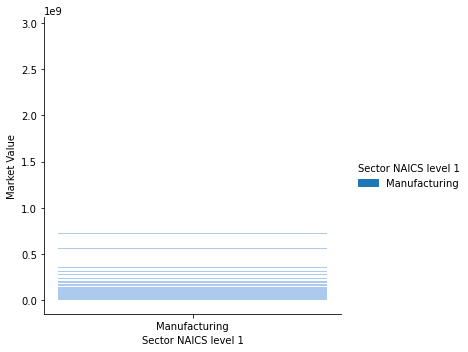

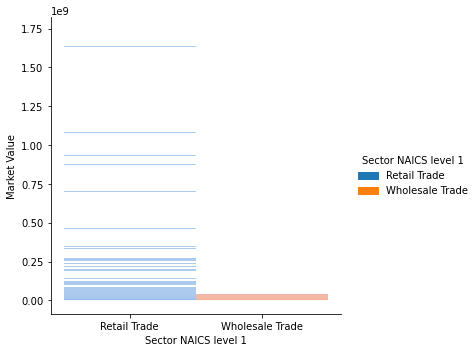

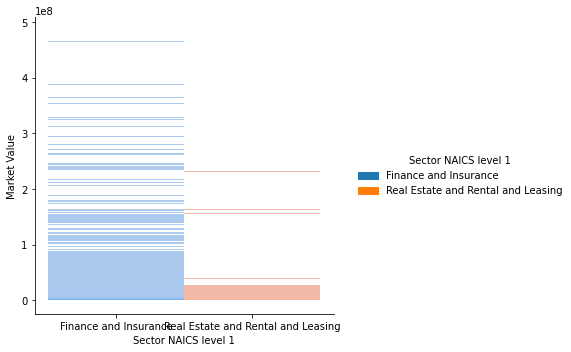

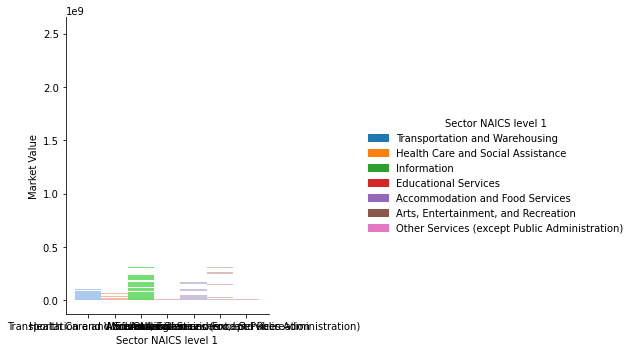

In [ ]:
plot = sns.displot(x="Sector NAICS level 1",y="Market Value",data=manufacturing, hue="Sector NAICS level 1")
plot = sns.displot(x="Sector NAICS level 1",y="Market Value",data=commercial, hue="Sector NAICS level 1")
plot = sns.displot(x="Sector NAICS level 1",y="Market Value",data=finantial_services, hue="Sector NAICS level 1")
plot = sns.displot(x="Sector NAICS level 1",y="Market Value",data=services, hue="Sector NAICS level 1")

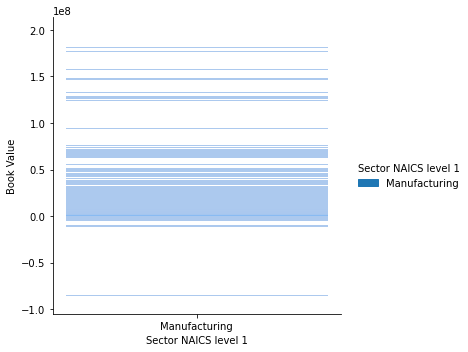

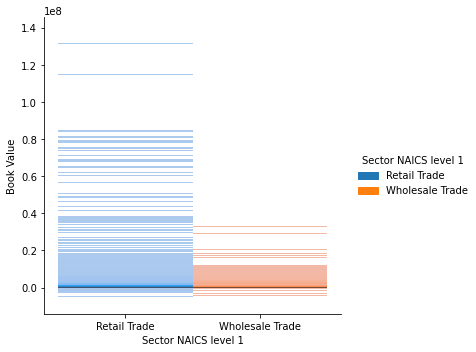

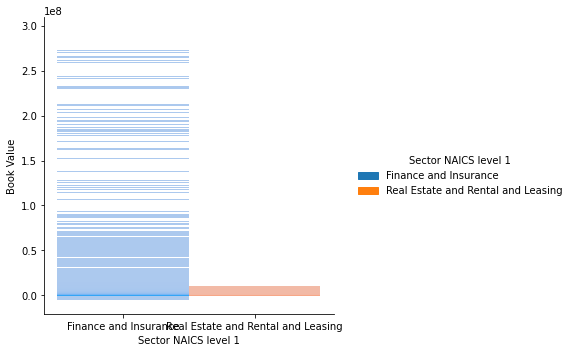

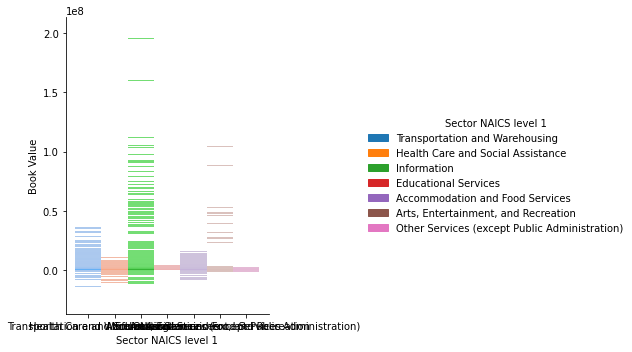

In [ ]:
plot = sns.displot(x="Sector NAICS level 1",y="Book Value",data=manufacturing, hue="Sector NAICS level 1")
plot = sns.displot(x="Sector NAICS level 1",y="Book Value",data=commercial, hue="Sector NAICS level 1")
plot = sns.displot(x="Sector NAICS level 1",y="Book Value",data=finantial_services, hue="Sector NAICS level 1")
plot = sns.displot(x="Sector NAICS level 1",y="Book Value",data=services, hue="Sector NAICS level 1")

> THE EFFECT OF MAKET VALUE ON FIRM SIZES SHOES WITH THE CALCULATIONS THAT THE TYPICAL FIRM SIZE BASED ON MARKET VALUES FOR THE COMMERCIAL INDUSTRY IS AROUND 2.083817 BILLIONS OF DOLLARS (2,083,817.97 THOUSANDS OF US DOLLARS) ; IN THE OTHER HAND FOR THE SERVICES INDUSTRY THE TYPICAL FIRM SIZE IS BASED ON A MARKET VALUE OF 2.184463 BILLIONS OF US DOLLARS (2,184,463.51 THOUSANDS OF US DOLLARS); THE FINANCIAL SERVICES SHOWED A TYPICAL FIRM SIZE BASEN ON MARKET VALUE IS 1.563696 BILLIONS OF US DOLLARS (1,563,695,93 THOUSANDS); AND LASTLY THE MANUFACTURING INDUSTRY HAS A TYPICAL FIRM SIZED BASEN ON MARKET VALUE OF 1.190025 BILLIONS OF US DOLLARS (1,190,025.10 THOUSANDS). 

> AND FOR ALL INDUSTRIES THE MARKET VALUE IS 1.576864 BILLIONS OF DOLLARS (1,576,864.41 THOUSANDS OF US DOLLARS). 

> SAYING THIS, WE CAN SEE HOW THE SERVICES INDUSTRY HAS THE HIGHER MARKET VALUE AND THE MANUFACTURING INDUSTRY HAS THE LOWER MARKET VALUE. 

> EVEN THOUGH THE VALUES ARE SIMILAR IT IS POSIBLE TO SEE A DIFFERENCE BETWEEN EACH INDUSTRY AND HOW THIS IS RELATED TO ITS FIRM SIZE. 

> IN TERMS OF BOOK VALUE FOR THE COMMERCIAL INDUSTRY, THE TYPICIAL FIRM SIZE BASED ON IT IS 723.936 MILLIONS OF DOLLARS (723,936 THOUSANDS OF DOLLARS); THE SERVICES INDUSTRY HAS A VALUE OF 544.419 MILLIONS OF DOLLARS (544,419 THOUSANDS OF US DOLLARS) IN TERMS OF TYPICIAL FIRM SIZED; THE FINANCIAL SERVICES INDUSTRY HAS A TYPICIAL FIRM SIZE BASED ON BOOK VALUE OF 893.833 MILLIONS OF US DOLLARS (893,833 THOUSANDS OF US DOLLARS); AND LASTLY FOR THE MANUFACTURING INDUSTRY THE TYPICAL FIRM SIZED BASEN ON BOOK VALUE IS 363.070 MILLIONS OF DOLLARS(363,070 THOUSANDS OF DOLLARS). 

> AND THE MEDIAN OF BOOK VALUE FOR ALL FIRMS IS 569.899 MILLIONS OF US DOLLARS (569,899 THOUSAND US DOLLARS). 

> WE CAN SEE HOW THE FINANCIAL SERVICES HAS THE HIGHER BOOK VALUE AND THE MANUFACTURING HAS THE LOWEST. 

> THERE IS A DIFFERENCE BETWEEN INDUSTRIES, WHERE THE GAP BETWEEN THE HIGHEST AND LOWEST IS SIGNIFICANT. 

> ALSO, WE CAN SEE HOW BOOK AND MARKET VALUE ARE RELATED, SINCE MANUFACTURING IS THE INDUSTRY THAT HAS THE LOWEST VALUE OF BOTH. 

> THE DISTRUBUTION IS SHOWED IN THE PLOTS ABOVE WHERE THE X AXIS INDICATES THE SECTOR AND THE Y AXIS INDICATES THE BOOK AND MARKET VALUE. 

##### 3. For each industry (and for all industries), what can you say about profit margin of firms? show a) descriptive statistics of profit margin and b) plot(s) to illustrate how profit margin changes across industries.

In [ ]:
# Replace 0 values of revenue
df["revenue"] = df["revenue"].replace(0,np.nan)

In [ ]:
# Get Earning Before Interests and Taxes (Ebit)
df["Ebit"] = df["revenue"] - df["cogs"] - df["sgae"]
df

revenue       cogs          sgae  otheropexp   extraincome  \
firm q                                                                      
A    2000Q1        NaN        NaN           NaN         NaN           NaN   
     2000Q2  2485000.0  1261000.0  1.010000e+06         0.0  42000.000000   
     2000Q3  2670000.0  1369000.0  1.091000e+06         0.0  28000.000000   
     2000Q4  3372000.0  1732000.0  1.182000e+06         0.0  10000.000000   
     2001Q1  2841000.0  1449000.0  1.113000e+06         0.0  -6000.000000   
...                ...        ...           ...         ...           ...   
ZYNE 2021Q3        NaN        0.0  1.021065e+04         0.0   -376.636750   
     2021Q4        NaN        0.0  8.836436e+03         0.0     16.937906   
     2022Q1        NaN        0.0  8.903915e+03         0.0    317.252110   
     2022Q2        NaN        0.0  9.168770e+03         0.0   -775.927860   
NaN  NaN           NaN        NaN           NaN         NaN           NaN   

             finexp  incometax  totalassets  totalliabilities   shortdebt  \
firm q                                                                      
A    2000Q1     NaN        NaN          NaN               NaN         NaN   
     2000Q2   0.000    90000.0  7321000.000       2679000.000  512000.000   
     2000Q3   0.000    83000.0  7827000.000       2925000.000  528000.000   
     2000Q4   0.000   163000.0  8425000.000       3160000.000  830000.000   
     2001Q1   0.000   119000.0  9208000.000       3667000.000  556000.000   
...             ...        ...          ...               ...         ...   
ZYNE 2021Q3  -5.038        0.0    89996.170         11309.171     207.635   
     2021Q4  -4.433        0.0    81171.507         10258.173     209.068   
     2022Q1 -96.044        0.0    74381.029          9214.059     210.512   
     2022Q2 -91.691        0.0    67006.959          9765.086     211.965   
NaN  NaN        NaN        NaN          NaN               NaN         NaN   

             ...       SAG        OPG       BMR       SFL       LFL         r  \
firm q       ...                                                                
A    2000Q1  ...  7.695946  26.439428  1.177942  0.035721  0.230566       NaN   
     2000Q2  ...  0.043241  -2.130057  0.139169  0.035721  0.096623       NaN   
     2000Q3  ...  0.478405  -1.614035  0.221116  0.035721  0.096623       NaN   
     2000Q4  ...  1.031325  -1.696049  0.210718  0.035721  0.096623       NaN   
     2001Q1  ...  0.992286  -1.631222  0.394756  0.035721  0.096623 -1.219152   
...          ...       ...        ...       ...       ...       ...       ...   
ZYNE 2021Q3  ...  7.695946  26.439428  0.449880  0.002307  0.096623  0.247615   
     2021Q4  ...  7.695946  26.439428  0.597384  0.002576  0.096623 -0.136132   
     2022Q1  ...  7.695946  26.439428  0.748904  0.002830  0.096623 -0.819027   
     2022Q2  ...  7.695946  26.439428  1.151762  0.003163  0.096623 -1.534790   
NaN  NaN     ...  7.695946  26.439428  1.177942  0.035721  0.230566       NaN   

                  F1r   Size Medium Big  
firm q                                   
A    2000Q1  0.727296  small      0   0  
     2000Q2  0.727296  small      0   0  
     2000Q3  0.727296  small      0   0  
     2000Q4 -0.771109  small      0   0  
     2001Q1 -0.771109  small      0   0  
...               ...    ...    ...  ..  
ZYNE 2021Q3 -0.136132  small      0   0  
     2021Q4 -0.771109  small      0   0  
     2022Q1 -0.771109  small      0   0  
     2022Q2  0.727296  small      0   0  
NaN  NaN     0.727296    NaN      0   0  

[324447 rows x 37 columns]

In [ ]:
# Get Operating Profit Margin
df["OPM"] = df["Ebit"]/df["revenue"]
df

revenue       cogs          sgae  otheropexp   extraincome  \
firm q                                                                      
A    2000Q1        NaN        NaN           NaN         NaN           NaN   
     2000Q2  2485000.0  1261000.0  1.010000e+06         0.0  42000.000000   
     2000Q3  2670000.0  1369000.0  1.091000e+06         0.0  28000.000000   
     2000Q4  3372000.0  1732000.0  1.182000e+06         0.0  10000.000000   
     2001Q1  2841000.0  1449000.0  1.113000e+06         0.0  -6000.000000   
...                ...        ...           ...         ...           ...   
ZYNE 2021Q3        NaN        0.0  1.021065e+04         0.0   -376.636750   
     2021Q4        NaN        0.0  8.836436e+03         0.0     16.937906   
     2022Q1        NaN        0.0  8.903915e+03         0.0    317.252110   
     2022Q2        NaN        0.0  9.168770e+03         0.0   -775.927860   
NaN  NaN           NaN        NaN           NaN         NaN           NaN   

             finexp  incometax  totalassets  totalliabilities   shortdebt  \
firm q                                                                      
A    2000Q1     NaN        NaN          NaN               NaN         NaN   
     2000Q2   0.000    90000.0  7321000.000       2679000.000  512000.000   
     2000Q3   0.000    83000.0  7827000.000       2925000.000  528000.000   
     2000Q4   0.000   163000.0  8425000.000       3160000.000  830000.000   
     2001Q1   0.000   119000.0  9208000.000       3667000.000  556000.000   
...             ...        ...          ...               ...         ...   
ZYNE 2021Q3  -5.038        0.0    89996.170         11309.171     207.635   
     2021Q4  -4.433        0.0    81171.507         10258.173     209.068   
     2022Q1 -96.044        0.0    74381.029          9214.059     210.512   
     2022Q2 -91.691        0.0    67006.959          9765.086     211.965   
NaN  NaN        NaN        NaN          NaN               NaN         NaN   

             ...  sharesoutstanding  fiscalmonth    year  cto  \
firm q       ...                                                
A    2000Q1  ...         452000.000          NaN  2000.0  1.0   
     2000Q2  ...         452271.967          6.0  2000.0  2.0   
     2000Q3  ...         453014.579          9.0  2000.0  3.0   
     2000Q4  ...         456366.381         12.0  2000.0  4.0   
     2001Q1  ...         456769.737          3.0  2001.0  1.0   
...          ...                ...          ...     ...  ...   
ZYNE 2021Q3  ...          41251.537          9.0  2021.0  3.0   
     2021Q4  ...          41217.537         12.0  2021.0  4.0   
     2022Q1  ...          42447.037          3.0  2022.0  1.0   
     2022Q2  ...          43595.959          6.0  2022.0  2.0   
NaN  NaN     ...                NaN          NaN     NaN  NaN   

                                     Name  Sector NAICS level 1  Market Value  \
firm q                                                                          
A    2000Q1     Agilent Technologies, Inc         Manufacturing  4.700800e+07   
     2000Q2     Agilent Technologies, Inc         Manufacturing  3.335506e+07   
     2000Q3     Agilent Technologies, Inc         Manufacturing  2.216940e+07   
     2000Q4     Agilent Technologies, Inc         Manufacturing  2.498606e+07   
     2001Q1     Agilent Technologies, Inc         Manufacturing  1.403653e+07   
...                                   ...                   ...           ...   
ZYNE 2021Q3  Zynerba Pharmaceuticals, Inc         Manufacturing  1.749065e+05   
     2021Q4  Zynerba Pharmaceuticals, Inc         Manufacturing  1.187065e+05   
     2022Q1  Zynerba Pharmaceuticals, Inc         Manufacturing  8.701643e+04   
     2022Q2  Zynerba Pharmaceuticals, Inc         Manufacturing  4.969939e+04   
NaN  NaN                              NaN                   NaN           NaN   

              Book Value      Ebit       OPM  
firm q                                        
A    2000Q1      

In [ ]:
# Get Net Income
df["Net Income"] = df["Ebit"] - df["incometax"] - df["finexp"] + df["extraincome"]
df

revenue       cogs          sgae  otheropexp   extraincome  \
firm q                                                                      
A    2000Q1        NaN        NaN           NaN         NaN           NaN   
     2000Q2  2485000.0  1261000.0  1.010000e+06         0.0  42000.000000   
     2000Q3  2670000.0  1369000.0  1.091000e+06         0.0  28000.000000   
     2000Q4  3372000.0  1732000.0  1.182000e+06         0.0  10000.000000   
     2001Q1  2841000.0  1449000.0  1.113000e+06         0.0  -6000.000000   
...                ...        ...           ...         ...           ...   
ZYNE 2021Q3        NaN        0.0  1.021065e+04         0.0   -376.636750   
     2021Q4        NaN        0.0  8.836436e+03         0.0     16.937906   
     2022Q1        NaN        0.0  8.903915e+03         0.0    317.252110   
     2022Q2        NaN        0.0  9.168770e+03         0.0   -775.927860   
NaN  NaN           NaN        NaN           NaN         NaN           NaN   

             finexp  incometax  totalassets  totalliabilities   shortdebt  \
firm q                                                                      
A    2000Q1     NaN        NaN          NaN               NaN         NaN   
     2000Q2   0.000    90000.0  7321000.000       2679000.000  512000.000   
     2000Q3   0.000    83000.0  7827000.000       2925000.000  528000.000   
     2000Q4   0.000   163000.0  8425000.000       3160000.000  830000.000   
     2001Q1   0.000   119000.0  9208000.000       3667000.000  556000.000   
...             ...        ...          ...               ...         ...   
ZYNE 2021Q3  -5.038        0.0    89996.170         11309.171     207.635   
     2021Q4  -4.433        0.0    81171.507         10258.173     209.068   
     2022Q1 -96.044        0.0    74381.029          9214.059     210.512   
     2022Q2 -91.691        0.0    67006.959          9765.086     211.965   
NaN  NaN        NaN        NaN          NaN               NaN         NaN   

             ...  fiscalmonth    year  cto                          Name  \
firm q       ...                                                           
A    2000Q1  ...          NaN  2000.0  1.0     Agilent Technologies, Inc   
     2000Q2  ...          6.0  2000.0  2.0     Agilent Technologies, Inc   
     2000Q3  ...          9.0  2000.0  3.0     Agilent Technologies, Inc   
     2000Q4  ...         12.0  2000.0  4.0     Agilent Technologies, Inc   
     2001Q1  ...          3.0  2001.0  1.0     Agilent Technologies, Inc   
...          ...          ...     ...  ...                           ...   
ZYNE 2021Q3  ...          9.0  2021.0  3.0  Zynerba Pharmaceuticals, Inc   
     2021Q4  ...         12.0  2021.0  4.0  Zynerba Pharmaceuticals, Inc   
     2022Q1  ...          3.0  2022.0  1.0  Zynerba Pharmaceuticals, Inc   
     2022Q2  ...          6.0  2022.0  2.0  Zynerba Pharmaceuticals, Inc   
NaN  NaN     ...          NaN     NaN  NaN                           NaN   

             Sector NAICS level 1  Market Value   Book Value      Ebit  \
firm q                                                                   
A    2000Q1         Manufacturing  4.700800e+07          NaN       NaN   
     2000Q2         Manufacturing  3.335506e+07  4642000.000  214000.0   
     2000Q3         Manufacturing  2.216940e+07  4902000.000  210000.0   
     2000Q4         Manufacturing  2.498606e+07  5265000.000  458000.0   
     2001Q1         Manufacturing  1.403653e+07  5541000.000  279000.0   
...                           ...           ...          ...       ...   
ZYNE 2021Q3         Manufacturing  1.749065e+05    78686.999       NaN   
     2021Q4         Manufacturing  1.187065e+05    70913.334       NaN   
     2022Q1         Manufacturing  8.701643e+04    65166.970       NaN   
     2022Q2         Manufacturing  4.969939e+04    57241.873       NaN   
NaN  NaN                      NaN           NaN          NaN       NaN   

                  OPM Net Income  
firm q                  

In [ ]:
# Get Prfit Margin
df["Profit Margin"] = (df["Net Income"] / df["revenue"]) * 100
df

revenue       cogs          sgae  otheropexp   extraincome  \
firm q                                                                      
A    2000Q1        NaN        NaN           NaN         NaN           NaN   
     2000Q2  2485000.0  1261000.0  1.010000e+06         0.0  42000.000000   
     2000Q3  2670000.0  1369000.0  1.091000e+06         0.0  28000.000000   
     2000Q4  3372000.0  1732000.0  1.182000e+06         0.0  10000.000000   
     2001Q1  2841000.0  1449000.0  1.113000e+06         0.0  -6000.000000   
...                ...        ...           ...         ...           ...   
ZYNE 2021Q3        NaN        0.0  1.021065e+04         0.0   -376.636750   
     2021Q4        NaN        0.0  8.836436e+03         0.0     16.937906   
     2022Q1        NaN        0.0  8.903915e+03         0.0    317.252110   
     2022Q2        NaN        0.0  9.168770e+03         0.0   -775.927860   
NaN  NaN           NaN        NaN           NaN         NaN           NaN   

             finexp  incometax  totalassets  totalliabilities   shortdebt  \
firm q                                                                      
A    2000Q1     NaN        NaN          NaN               NaN         NaN   
     2000Q2   0.000    90000.0  7321000.000       2679000.000  512000.000   
     2000Q3   0.000    83000.0  7827000.000       2925000.000  528000.000   
     2000Q4   0.000   163000.0  8425000.000       3160000.000  830000.000   
     2001Q1   0.000   119000.0  9208000.000       3667000.000  556000.000   
...             ...        ...          ...               ...         ...   
ZYNE 2021Q3  -5.038        0.0    89996.170         11309.171     207.635   
     2021Q4  -4.433        0.0    81171.507         10258.173     209.068   
     2022Q1 -96.044        0.0    74381.029          9214.059     210.512   
     2022Q2 -91.691        0.0    67006.959          9765.086     211.965   
NaN  NaN        NaN        NaN          NaN               NaN         NaN   

             ...    year  cto                          Name  \
firm q       ...                                              
A    2000Q1  ...  2000.0  1.0     Agilent Technologies, Inc   
     2000Q2  ...  2000.0  2.0     Agilent Technologies, Inc   
     2000Q3  ...  2000.0  3.0     Agilent Technologies, Inc   
     2000Q4  ...  2000.0  4.0     Agilent Technologies, Inc   
     2001Q1  ...  2001.0  1.0     Agilent Technologies, Inc   
...          ...     ...  ...                           ...   
ZYNE 2021Q3  ...  2021.0  3.0  Zynerba Pharmaceuticals, Inc   
     2021Q4  ...  2021.0  4.0  Zynerba Pharmaceuticals, Inc   
     2022Q1  ...  2022.0  1.0  Zynerba Pharmaceuticals, Inc   
     2022Q2  ...  2022.0  2.0  Zynerba Pharmaceuticals, Inc   
NaN  NaN     ...     NaN  NaN                           NaN   

             Sector NAICS level 1  Market Value   Book Value      Ebit  \
firm q                                                                   
A    2000Q1         Manufacturing  4.700800e+07          NaN       NaN   
     2000Q2         Manufacturing  3.335506e+07  4642000.000  214000.0   
     2000Q3         Manufacturing  2.216940e+07  4902000.000  210000.0   
     2000Q4         Manufacturing  2.498606e+07  5265000.000  458000.0   
     2001Q1         Manufacturing  1.403653e+07  5541000.000  279000.0   
...                           ...           ...          ...       ...   
ZYNE 2021Q3         Manufacturing  1.749065e+05    78686.999       NaN   
     2021Q4         Manufacturing  1.187065e+05    70913.334       NaN   
     2022Q1         Manufacturing  8.701643e+04    65166.970       NaN   
     2022Q2         Manufacturing  4.969939e+04    57241.873       NaN   
NaN  NaN                      NaN           NaN          NaN       NaN   

                  OPM Net Income Profit Margin  
firm q                                          
A    2000Q1       NaN        NaN           NaN  
     2000Q2  0.086117   166000.0      6.680080  
     2000Q3  0.078652   155000.0

In [ ]:
# Get profit margin for all industries
pm = df["Profit Margin"].median()
print("The profit margin for all industries is", pm)

The profit margin for all industries is 6.58140424939692


In [ ]:
# Get median of profit margin commercial industry
commercial = df.loc[(df["Sector NAICS level 1"] == "Wholesale Trade") | (df["Sector NAICS level 1"] == "Retail Trade")]
pm_c = commercial["Profit Margin"].median()
print("The profit margin for Commercial Industry is", pm_c)

The profit margin for Commercial Industry is 3.3084180860188703


In [ ]:
# Get median of profit margin services industry
services = df.loc[(df["Sector NAICS level 1"] == "Accommodation and Food Services") | (df["Sector NAICS level 1"] == "Administrative and Support and Waste Managment and Remedation Services") | (df["Sector NAICS level 1"] == "Arts, Entertainment, and Recreation") | (df["Sector NAICS level 1"] == "Educational Services") | (df["Sector NAICS level 1"] == "Health Care and Social Assistance") | (df["Sector NAICS level 1"] == "Information") | (df["Sector NAICS level 1"] == "Other Services (except Public Administration)") | (df["Sector NAICS level 1"] == "Profession, Scientific and Technical Services") | (df["Sector NAICS level 1"] == "Transportation and Warehousing")]
pm_s = services["Profit Margin"].median()
print("The profit margin for Services Industry is", pm_s)

The profit margin for Services Industry is 5.231709429200584


In [ ]:
# Get median of profit margin finantial services industry
finantial_services = df.loc[(df["Sector NAICS level 1"] == "Finance and Insurance") | (df["Sector NAICS level 1"] == "Real Estate and Rental and Leasing")]
pm_f = finantial_services["Profit Margin"].median()
print("The profit margin for Finantial Services Industry is", pm_f)

The profit margin for Finantial Services Industry is 19.226256156014916


In [ ]:
# Get median of profit margin manufacturing services industry
manufacturing = df.loc[(df["Sector NAICS level 1"] == "Manufacturing")]
pm_m = manufacturing["Profit Margin"].median()
print("The profit margin for Manufacturing Industry is", pm_m)

The profit margin for Manufacturing Industry is 4.764966247125442


In [ ]:
# Get descriptive statistics for all industries 
pm = df["Profit Margin"].describe()
pm

count    1.519330e+05
mean    -7.528182e+02
std      3.826266e+04
min     -1.014032e+07
25%      3.093952e-01
50%      6.581404e+00
75%      1.601327e+01
max      4.819100e+06
Name: Profit Margin, dtype: float64

In [ ]:
# Get descriptive statistics for commercial industries 
pm_c = commercial["Profit Margin"].describe()
pm_c

count    11545.000000
mean        -2.559992
std        262.987353
min     -25483.333333
25%          1.172095
50%          3.308418
75%          6.609482
max       3327.005068
Name: Profit Margin, dtype: float64

In [ ]:
# Get descriptive statistics for services industries 
pm_s = services["Profit Margin"].describe()
pm_s

count    2.084300e+04
mean    -2.563410e+02
std      1.632628e+04
min     -2.191800e+06
25%     -2.529528e+00
50%      5.231709e+00
75%      1.220575e+01
max      5.975509e+04
Name: Profit Margin, dtype: float64

In [ ]:
# Get descriptive statistics for finantial services industries 
pm_f = finantial_services["Profit Margin"].describe()
pm_f

count     37404.000000
mean        -47.742997
std        6081.301120
min     -980500.000000
25%           6.782340
50%          19.226256
75%          31.465426
max      195966.666667
Name: Profit Margin, dtype: float64

In [ ]:
# Get descriptive statistics for manufacturing industries 
pm_m = manufacturing["Profit Margin"].describe()
pm_m

count    5.731900e+04
mean    -1.725109e+03
std      5.982488e+04
min     -1.014032e+07
25%     -6.607625e+00
50%      4.764966e+00
75%      1.041069e+01
max      4.819100e+06
Name: Profit Margin, dtype: float64

> THE OPERATING PROFIT MARGIN IS CALCULATED BY THE OPERATING PROFIT DIVIDED BY SALES, THIS VALUE INDICATES HOW MUCH PROFIT A COMPANY MAKES AFTER DIFFERENT PAYS. A HIGH VALUE INDICATES DE COMPANY IS EARNING ENOUGH MONEY TO PAY FOR COSTS. 

> IN THIS CASE WE HAVE A MEDIAN OF OPERATING PROFIT MARGIN VALUE FOR ALL INDUSTRIES OF 6.58; 3.3 FOR THE COMMERCIAL INDUSTRY; 5.2 FOR SERVICES INDUSTRY; 19.2 FOR FINANTIAL INDUSTRY AND 4.7 FOR MANUFACTURING. WHERE FINANTIAL SERVICES INDUSTRY HAS THE HIGHEST AND THE COMMERCIAL INDUSTRY HAS THE LOWEST.  

Text(0.5, 1.0, 'Profit Margin for Manufacturing by Quartil')

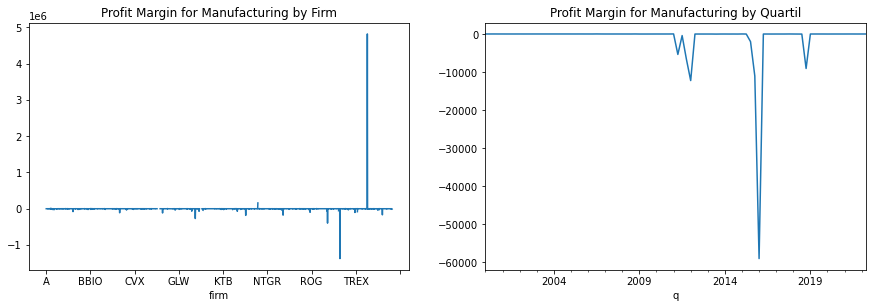

In [ ]:
industry1f =manufacturing["Profit Margin"].groupby(["firm"]).last()
industry1g =manufacturing["Profit Margin"].groupby(["q"]).last()
fig = plt.figure(figsize=(15, 10))
axisf = fig.add_subplot(221)
axisg = fig.add_subplot(222)
industry1f.plot(ax=axisf)
industry1g.plot(ax=axisg)
axisf.set_title("Profit Margin for Manufacturing by Firm")
axisg.set_title("Profit Margin for Manufacturing by Quartil")

Text(0.5, 1.0, 'Profit Margin for Commercial by Quartil')

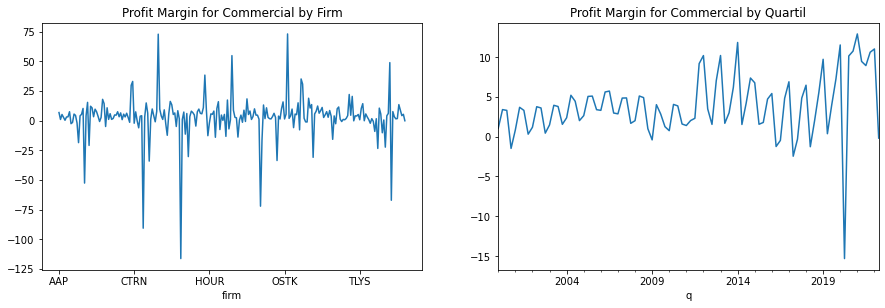

In [ ]:
industry2f =commercial["Profit Margin"].groupby(["firm"]).last()
industry2g =commercial["Profit Margin"].groupby(["q"]).last()
fig = plt.figure(figsize=(15, 10))
axisf = fig.add_subplot(221)
axisg = fig.add_subplot(222)
industry2f.plot(ax=axisf)
industry2g.plot(ax=axisg)
axisf.set_title("Profit Margin for Commercial by Firm")
axisg.set_title("Profit Margin for Commercial by Quartil")

Text(0.5, 1.0, 'Profit Margin for Services by Quartil')

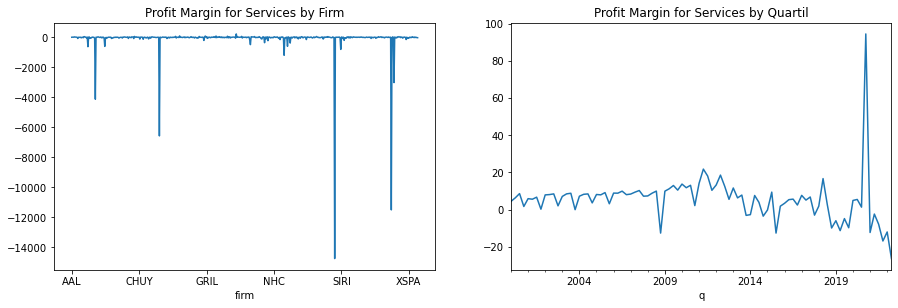

In [ ]:
industry3f =services["Profit Margin"].groupby(["firm"]).last()
industry3g =services["Profit Margin"].groupby(["q"]).last()
fig = plt.figure(figsize=(15, 10))
axisf = fig.add_subplot(221)
axisg = fig.add_subplot(222)
industry3f.plot(ax=axisf)
industry3g.plot(ax=axisg)
axisf.set_title("Profit Margin for Services by Firm")
axisg.set_title("Profit Margin for Services by Quartil")

Text(0.5, 1.0, 'Profit Margin for Finantial Services by Quartil')

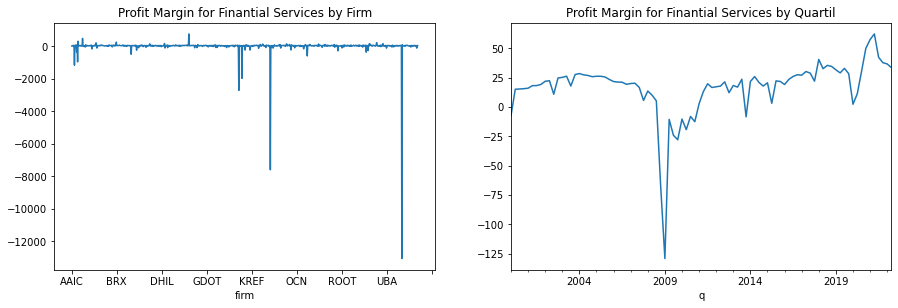

In [ ]:
industry4f =finantial_services["Profit Margin"].groupby(["firm"]).last()
industry4g =finantial_services["Profit Margin"].groupby(["q"]).last()
fig = plt.figure(figsize=(15, 10))
axisf = fig.add_subplot(221)
axisg = fig.add_subplot(222)
industry4f.plot(ax=axisf)
industry4g.plot(ax=axisg)
axisf.set_title("Profit Margin for Finantial Services by Firm")
axisg.set_title("Profit Margin for Finantial Services by Quartil")

THE PLOTS ABOVE SHOW THE PROFIT MARGIN (Y IN AXIS) ADN ITS VALUE BY FIRM AND QUARTIL, AND WE CAN SEE HOW MUCH IT CHANGES.

##### 4. Which are the biggest 10 US firms in terms of market value and how far they are from the typical size of a US firm?

In [ ]:
bfirms = df.groupby(["firm"]).last()
bfirms_mv = bfirms.nlargest(10,"Market Value")
bfirms_mv

,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,totalliabilities,shortdebt,...,year,cto,Name,Sector NAICS level 1,Market Value,Book Value,Ebit,OPM,Net Income,Profit Margin
firm,,,,,,,,,,,,,,,,,,,,,
AAPL,82959000.0,47074000.0,12809000.0,0.0,-10000.0,0.0,3624000.0,336309000.0,278202000.0,24991000.0,...,2022.0,2.0,Apple Inc,Manufacturing,2.212838e+09,58107000.0,23076000.0,0.278162,19442000.0,23.435673
MSFT,51865000.0,16429000.0,14902000.0,0.0,-47000.0,0.0,3747000.0,364840000.0,198298000.0,2749000.0,...,2022.0,2.0,Microsoft Corp,Information,1.920840e+09,166542000.0,20534000.0,0.395912,16740000.0,32.276101
GOOGL,69685000.0,30104000.0,20128000.0,0.0,-439000.0,0.0,3012000.0,355185000.0,99766000.0,0.0,...,2022.0,2.0,Alphabet Inc,"Professional, Scientific, and Technical Services",1.435042e+09,255419000.0,19453000.0,0.279156,16002000.0,22.963335
AMZN,121234000.0,66424000.0,51403000.0,90000.0,-5557000.0,425000.0,-637000.0,419728000.0,288326000.0,0.0,...,2022.0,2.0,"Amazon.Com, Inc",Retail Trade,1.080624e+09,131402000.0,3407000.0,0.028103,-1938000.0,-1.598561
TSLA,16934000.0,12700000.0,1628000.0,142000.0,18000.0,18000.0,205000.0,68513000.0,31276000.0,1532000.0,...,2022.0,2.0,"Tesla, Inc",Manufacturing,6.976698e+08,37237000.0,2606000.0,0.153892,2401000.0,14.178576
BRK_A,76180000.0,0.0,131662000.0,0.0,-379000.0,0.0,-12106000.0,909860000.0,448631000.0,NaN,...,2022.0,2.0,None,None,6.015139e+08,461229000.0,-55482000.0,-0.728301,-43755000.0,-57.436335
UNH,80332000.0,73200000.0,0.0,0.0,-129000.0,467000.0,1466000.0,230172000.0,153967000.0,5592000.0,...,2022.0,2.0,Unitedhealth Group Inc,Finance and Insurance,4.818731e+08,76205000.0,7132000.0,0.088782,5070000.0,6.311308
JNJ,24020000.0,7919000.0,9929000.0,85000.0,-273000.0,-26000.0,1026000.0,177724000.0,101367000.0,4305000.0,...,2022.0,2.0,Johnson & Johnson,Manufacturing,4.671001e+08,76357000.0,6172000.0,0.256953,4899000.0,20.395504
META,28822000.0,5192000.0,15272000.0,0.0,-172000.0,0.0,1499000.0,169779000.0,44012000.0,1275000.0,...,2022.0,2.0,"Meta Platforms, Inc","Professional, Scientific, and Technical Services",4.363946e+08,125767000.0,8358000.0,0.289987,6687000.0,23.201027


> THIS SHOWS THAT THE BIGGEST FIRMS IN TERMS OF  MARKET VALUE ARE: APPLE, MICROSOFT, GOOGLE, AMAZON, TESLA,  BERKSHIRE, UNITED HEALTH, JOHNSON AND JOHNSON, META AND NVIDIA. THE MARKET VALUE IS CONSIDERABLY HIGH COMPARED TO THE AVERAGE

##### 5.Which are the biggest 10 US firms in terms of book value and how far they are from the typical size of a US firm?

In [ ]:
bfirms = df.groupby(["firm"]).last()
bfirms_bv = bfirms.nlargest(10,"Book Value")
bfirms_bv

,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,totalliabilities,shortdebt,...,year,cto,Name,Sector NAICS level 1,Market Value,Book Value,Ebit,OPM,Net Income,Profit Margin
firm,,,,,,,,,,,,,,,,,,,,,
BRK_A,76180000.0,0.0,131662000.0,0.0,-379000.0,0.0,-12106000.0,9.098600e+08,4.486310e+08,NaN,...,2022.0,2.0,None,None,6.015139e+08,461229000.0,-55482000.0,-0.728301,-43755000.0,-57.436335
JPM,18646000.0,3518000.0,0.0,0.0,-4263000.0,0.0,2216000.0,3.841314e+09,3.555171e+09,NaN,...,2022.0,2.0,Jpmorgan Chase & Co,Finance and Insurance,3.302370e+08,286143000.0,15128000.0,0.811327,8649000.0,46.385284
BAC,14975000.0,2531000.0,0.0,0.0,-5552000.0,0.0,645000.0,3.111606e+09,2.842488e+09,NaN,...,2022.0,2.0,Bank Of America Corp,Finance and Insurance,2.508107e+08,269118000.0,12444000.0,0.830985,6247000.0,41.716194
GOOGL,69685000.0,30104000.0,20128000.0,0.0,-439000.0,0.0,3012000.0,3.551850e+08,9.976600e+07,0.0,...,2022.0,2.0,Alphabet Inc,"Professional, Scientific, and Technical Services",1.435042e+09,255419000.0,19453000.0,0.279156,16002000.0,22.963335
C,15630000.0,3666000.0,0.0,0.0,-6235000.0,0.0,1182000.0,2.380904e+09,2.181278e+09,NaN,...,2022.0,2.0,Citigroup Inc,Finance and Insurance,8.906928e+07,199626000.0,11964000.0,0.765451,4547000.0,29.091491
XOM,111265000.0,76299000.0,6981000.0,7154000.0,3572000.0,194000.0,6359000.0,3.677740e+08,1.832660e+08,7367000.0,...,2022.0,2.0,Exxon Mobil Corp,Manufacturing,3.569164e+08,184508000.0,27985000.0,0.251517,25004000.0,22.472476
WFC,11556000.0,1358000.0,0.0,0.0,-6466000.0,0.0,613000.0,1.881142e+09,1.701349e+09,NaN,...,2022.0,2.0,Wells Fargo & Company,Finance and Insurance,1.484681e+08,179793000.0,10198000.0,0.882485,3119000.0,26.990308
MSFT,51865000.0,16429000.0,14902000.0,0.0,-47000.0,0.0,3747000.0,3.648400e+08,1.982980e+08,2749000.0,...,2022.0,2.0,Microsoft Corp,Information,1.920840e+09,166542000.0,20534000.0,0.395912,16740000.0,32.276101
CVX,68762000.0,46321000.0,4563000.0,1759000.0,-80000.0,129000.0,4288000.0,2.579360e+08,1.033740e+08,3230000.0,...,2022.0,2.0,Chevron Corp,Manufacturing,2.833974e+08,154562000.0,17878000.0,0.259998,13381000.0,19.459876


> IN TERMS OF BOOK VALUE THE COMPANIES WITH THE HIGHGES PNE ARE, BERKSHIRE, JP MORGAN, BAC, GOOGLE, C, COM, WFC, MICROSOFT, CVX, T. SOME ARE THE BIGGEST ALSO IN TERMS OF MARKKT VALUE. THE AVERAGE OF BOOK VALUE IS SIGNIFICALTY DIFFERENT.

##### 2.2.1.2 Considering the whole history of financial data for all firms

##### 1. How can you measure firm profitability that can be used to compare performance among firms of different sizes? Select and justify at least 3 measures and show descriptive statistics.

> THE PROFITABILITY IS BASICALLY THE ABILITY OF COMPANIES TO GENERATE EARNINGS RELATIVE TO ITS REVENUE, AND OTHER EXPENSES OR COSTS.

##### 2. Calculate and explain earnings per share deflated by price

In [ ]:
# Create earnings per share variable
EPS = df["Ebit"] / df["sharesoutstanding"]

In [ ]:

# Create earnings per share deflated by price column
df["EPSP"] = EPS / df["originalprice"]
df["EPSP"]

firm  q     
A     2000Q1         NaN
      2000Q2    0.006416
      2000Q3    0.009473
      2000Q4    0.018330
      2001Q1    0.019877
                  ...   
ZYNE  2021Q3         NaN
      2021Q4         NaN
      2022Q1         NaN
      2022Q2         NaN
NaN   NaN            NaN
Name: EPSP, Length: 324447, dtype: float64

> EARNINGS PER SHARE IS EARNINGS(NET INCOME) DIVIDED BY NUMBER OF SHARES, IF WE DIVIDE THIS BY THE STOCK PRICE, THEN WE GET THE EARNINGS PER SHARE DEFLATED BY PRICE. THIS MEASURE IS THE AMOUNT OF EARNINGS THAT EACH $1 OF THE MARKET VALUE COULD RECEIVE AS THE EARNING.

#### 2.2.2 About Statistical modeling

##### 1. You have to select a group of firms according to their general industry classification:

> FOR THIS CASE IT WILL NOT BE MADE BY INDUSTRY BUT GENERAL.

##### 2. Using your subset of firms that belong to your industry, which factors (variables) might be related to annual stock return one quater in the future? Select at least 3 factors and briefly explain why you think they might be related to stock returns

> THE FACTORS THAT MIGHT BE RELATED TO ANNUAL STOCK RETURN COULD BE THE SALES ANNUAL GROWTH, THE OPERATING PROFIT GROWTH, THE OPERATING PROFIT MARGIN, BOOK TO MARKET RATIO, SHORT AND LARGE FINANCIAL LEVERAGE, THIS BEACAUSE THEY ARE OBTAINED WITH VARIABLES LIKE REVENUE, INCOME, ASSETS AND ALSO BECAUSE OF THEIR SIGNIFICANCE. 



##### 2.1 Do histograms for each factor/variables and interpret them

In [ ]:
# Get sales annual growth
df["SAG"] = (df["revenue"] / (df["revenue"].shift(-4)))-1

# Get Operating Profit Growth
df["OPG"] = (df["Ebit"] / (df["Ebit"].shift(-4)))-1

# Get Book to Market Ratio 
df["BMR"] = df["Book Value"] / df["Market Value"]

# Get short financial leverage 
df["SFL"] = df["shortdebt"] / df["totalassets"]

# Get long financial leverage
df["LFL"] = df["longdebt"] / df["totalassets"]

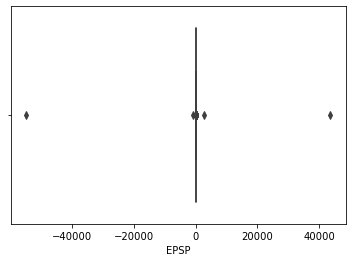

In [ ]:
EPSP_plot = sns.boxplot(data=df, x="EPSP")

[(-2000.0, 10000.0)]

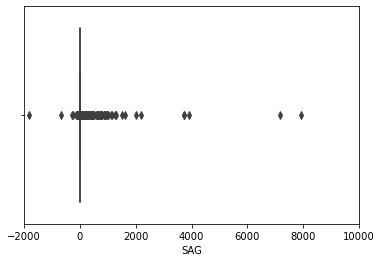

In [ ]:
SAG_plot = sns.boxplot(data=df, x="SAG")
SAG_plot.set(xlim=(-2000,10000))

c:\Users\Mariana\anaconda3\lib\site-packages\numpy\core\_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


[(-4000.0, 6000.0)]

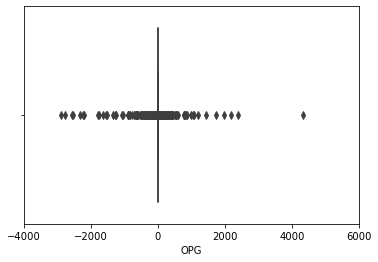

In [ ]:
OPG_plot = sns.boxplot(data=df, x="OPG")
OPG_plot.set(xlim=(-4000,6000))

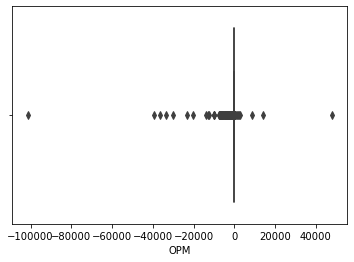

In [ ]:
OPM_plot = sns.boxplot(data=df, x="OPM")

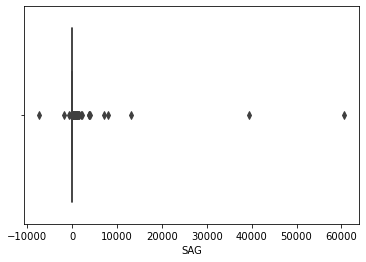

In [ ]:
SAG_plot = sns.boxplot(data=df, x="SAG")

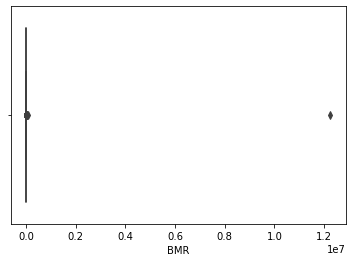

In [ ]:
BMR_plot = sns.boxplot(data=df, x="BMR")

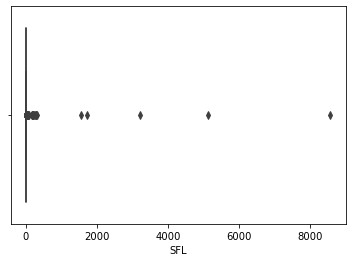

In [ ]:
SFL_plot = sns.boxplot(data=df, x="SFL")

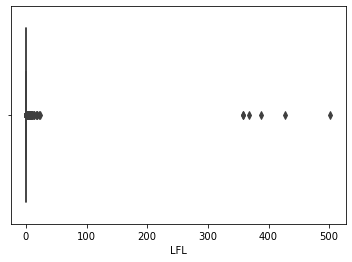

In [ ]:
LFL_plot = sns.boxplot(data=df, x="LFL")

> A BOX PLOT IS THE EASIEST WAY TO SEE THE DATA DISTRIBUTION OF THE VARIABLES BECAUSE OF THE SEVERAL EXTREME VALUES(OUTLIERS), THE X INDICATES THE DIFFERENT INDEPENDENT VARIABLES. 

##### 2.2 Do plots to visualize the possible relationship each factor might have with the dependent variable.

In [ ]:
# Get dependant variable - stock returns
df["r"] = np.log(df["adjprice"]) - np.log(df["adjprice"].shift(4))
df[["adjprice","r"]]

adjprice         r
firm q                          
A    2000Q1  63.761670       NaN
     2000Q2  45.215607       NaN
     2000Q3  30.003238       NaN
     2000Q4  33.566841       NaN
     2001Q1  18.840347 -1.219152
...                ...       ...
ZYNE 2021Q3   4.240000  0.247615
     2021Q4   2.880000 -0.136132
     2022Q1   2.050000 -0.819027
     2022Q2   1.140000 -1.534790
NaN  NaN           NaN       NaN

[324447 rows x 2 columns]

In [ ]:
df["F1r"] = df["r"].shift(-1)
df[["r", "adjprice", "F1r"]]

r   adjprice       F1r
firm q                                    
A    2000Q1       NaN  63.761670       NaN
     2000Q2       NaN  45.215607       NaN
     2000Q3       NaN  30.003238       NaN
     2000Q4       NaN  33.566841 -1.219152
     2001Q1 -1.219152  18.840347 -0.819441
...               ...        ...       ...
ZYNE 2021Q3  0.247615   4.240000 -0.136132
     2021Q4 -0.136132   2.880000 -0.819027
     2022Q1 -0.819027   2.050000 -1.534790
     2022Q2 -1.534790   1.140000       NaN
NaN  NaN          NaN        NaN       NaN

[324447 rows x 3 columns]

In [ ]:
df[["EPSP","SAG", "OPG", "OPM", "BMR", "SFL", "LFL"]].corr(method='pearson')

,EPSP,SAG,OPG,OPM,BMR,SFL,LFL
EPSP,1.000000,0.000003,0.000021,0.000009,-0.778776,-0.000447,-0.000337
SAG,0.000003,1.000000,0.000122,0.000163,0.000004,0.001015,-0.003112
OPG,0.000021,0.000122,1.000000,0.000064,-0.000019,-0.000241,0.001026
OPM,0.000009,0.000163,0.000064,1.000000,0.000049,-0.005180,0.007676
BMR,-0.778776,0.000004,-0.000019,0.000049,1.000000,-0.000005,0.001566
SFL,-0.000447,0.001015,-0.000241,-0.005180,-0.000005,1.000000,0.033693
LFL,-0.000337,-0.003112,0.001026,0.007676,0.001566,0.033693,1.000000


> TO GET THE POSSIBLE RELATIONSHIP OF VARIABLES WE GET THE CORRELATIONS, HERE WE CAN SEE CASES WHERE ITS SIGNIFICANT AND OTHERS WHERE ITS NOT, AND SOME WHO ARE VERY HIGH.

##### 2.3 Show descriptive statistics of these factors

In [ ]:
df["F1r"].describe()

count    147326.000000
mean          0.025036
std           0.585169
min          -8.748305
25%          -0.165716
50%           0.085107
75%           0.292363
max          12.756726
Name: F1r, dtype: float64

In [ ]:
df["EPSP"].describe()

count    146569.000000
mean         -0.050207
std         183.472994
min      -54962.646745
25%           0.004817
50%           0.018205
75%           0.035087
max       43638.968481
Name: EPSP, dtype: float64

In [ ]:
df["SAG"].describe()

count    140397.000000
mean          1.406060
std         200.342258
min       -7302.000000
25%          -0.163399
50%          -0.060946
75%           0.031148
max       60514.200000
Name: SAG, dtype: float64

In [ ]:
df["OPG"].describe() 

count    1.400910e+05
mean              NaN
std               NaN
min              -inf
25%     -3.839403e-01
50%     -1.064895e-01
75%      8.487594e-02
max               inf
Name: OPG, dtype: float64

In [ ]:
df["OPM"].describe()

count    151934.000000
mean         -7.037178
std         374.802499
min     -101440.014085
25%           0.023297
50%           0.108946
75%           0.246733
max       47854.000000
Name: OPM, dtype: float64

In [ ]:
df["BMR"].describe()

count    1.531670e+05
mean     8.130672e+01
std      3.129804e+04
min     -2.873941e+02
25%      2.295224e-01
50%      4.455809e-01
75%      7.587253e-01
max      1.224872e+07
Name: BMR, dtype: float64

In [ ]:
df["SFL"].describe()

count    1.296760e+05
mean              inf
std               NaN
min     -9.816460e-03
25%      0.000000e+00
50%      8.644795e-03
75%      3.561352e-02
max               inf
Name: SFL, dtype: float64

In [ ]:
df["LFL"].describe()

count    1.595930e+05
mean              inf
std               NaN
min      0.000000e+00
25%      2.095881e-02
50%      1.566644e-01
75%      3.331792e-01
max               inf
Name: LFL, dtype: float64

#### 3. Design and run a multiple regression model to examine whether your selected factors and earnings per share deflated by price can explain/predict annual stock returns. You have to control for industry and firm size. To control for these variables you have to include them as extra independent variables in the model

##### 3.1 Your independent variables must be in the right scale so that you can compare the values of the variables among different firms of any size

##### 3.2 For each independent variable you have to check for outliers and do the corresponding adjustments to avoid unreliable results in your regression model

In [ ]:
from scipy.stats.mstats import winsorize

In [ ]:
winsorize(df["EPSP"], limits=[0.19, 0.7], inplace=True, nan_policy='propagate')

masked_array(data=[0.0272332 , 0.01455054, 0.01455054, ..., 0.0272332 ,
                   0.0272332 , 0.0272332 ],
             mask=False,
       fill_value=1e+20)

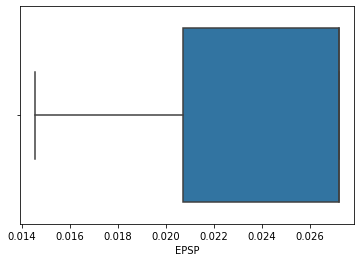

In [ ]:
EPSP_plot = sns.boxplot(data=df, x="EPSP")

In [ ]:
winsorize(df["SAG"], limits=[0.02, 0.57], inplace=True, nan_policy='propagate')

masked_array(data=[7.69594595, 0.04324097, 0.47840532, ..., 7.69594595,
                   7.69594595, 7.69594595],
             mask=False,
       fill_value=1e+20)

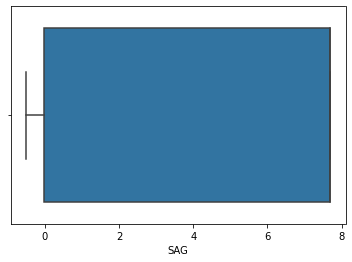

In [ ]:
SAG_plot = sns.boxplot(data=df, x="SAG")

In [ ]:
winsorize(df["OPG"], limits=[0.02, 0.57], inplace=True, nan_policy='propagate')

masked_array(data=[26.43942781, -2.13005709, -1.61403509, ...,
                   26.43942781, 26.43942781, 26.43942781],
             mask=False,
       fill_value=1e+20)

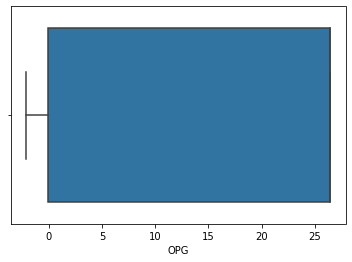

In [ ]:
OPG_plot = sns.boxplot(data=df, x="OPG")

In [ ]:
winsorize(df["OPM"], limits=[0.05, 0.57], inplace=True, nan_policy='propagate')

masked_array(data=[0.76957043, 0.0861167 , 0.07865169, ..., 0.76957043,
                   0.76957043, 0.76957043],
             mask=False,
       fill_value=1e+20)

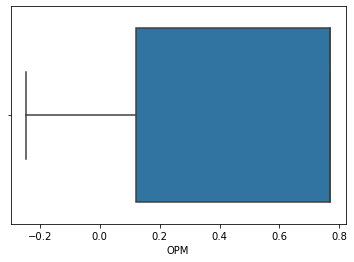

In [ ]:
OPM_plot = sns.boxplot(data=df, x="OPM")

In [ ]:
winsorize(df["BMR"], limits=[0.02, 0.57], inplace=True, nan_policy='propagate')

masked_array(data=[1.17794169, 0.1391693 , 0.22111558, ..., 0.74890424,
                   1.15176201, 1.17794169],
             mask=False,
       fill_value=1e+20)

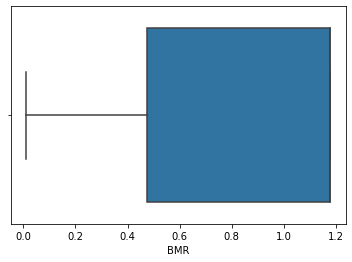

In [ ]:
BMR_plot = sns.boxplot(data=df, x="BMR")

In [ ]:
winsorize(df["SFL"], limits=[0.03, 0.7], inplace=True, nan_policy='propagate')

masked_array(data=[0.03572067, 0.03572067, 0.03572067, ..., 0.00283018,
                   0.00316333, 0.03572067],
             mask=False,
       fill_value=1e+20)

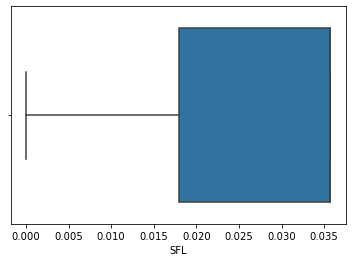

In [ ]:
SFL_plot = sns.boxplot(data=df, x="SFL")

In [ ]:
winsorize(df["LFL"], limits=[0.2, 0.7], inplace=True, nan_policy='propagate')

masked_array(data=[0.23056626, 0.09662258, 0.09662258, ..., 0.09662258,
                   0.09662258, 0.23056626],
             mask=False,
       fill_value=1e+20)

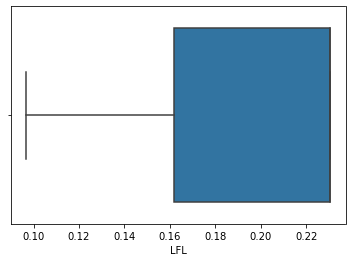

In [ ]:
LFL_plot = sns.boxplot(data=df, x="LFL")

In [ ]:
winsorize(df["F1r"], limits=[0.03, 0.57], inplace=True, nan_policy='propagate')

masked_array(data=[ 0.72729613,  0.72729613,  0.72729613, ...,
                   -0.77110872,  0.72729613,  0.72729613],
             mask=False,
       fill_value=1e+20)

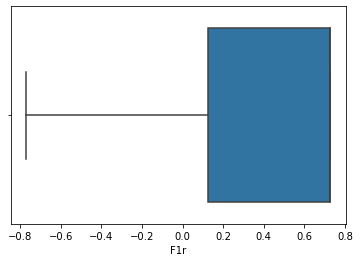

In [ ]:
F1r_plot = sns.boxplot(data=df, x="F1r")

> BY SEEING THE GRAPHS OF EACH VARIABLE IT WAS POSSIBLE TO SEE A LOT OF OUTLIERS, THIS VALUES ARE GIVEN BECAUSE OF THE VERY BIG OR VERY SMALL COMPANIES, WHERE ITS VALUES ARE VERY HIGH, AS WE SAW IN THE CASES OF BOOK AND MARKET VALUES. THE OUTLIERS COULD GIVE US TROUBLE WHEN WE MAKE THE MODEL BECAUSE THEY ARE NOT THE AVERAGE ONESTHEY CAN MAKE THE BETA COEFICIENT AND THEIR STD ERRORS TO BE UNRELIEBALE SO , TO GET RID OF THEM WE USE A TECHNIQUE CALLED WINSORIZATION TO FIX INESTABILITY.  

##### 3.3 You must check for possible multicollinearity problems. Briefly explain what is multicollinearity, run and interpret the corresponding test

In [ ]:
# Get size of each 
df.sort_values("Market Value").groupby("q")
df["Size"] = pd.cut(df["Market Value"], bins=3, labels=["small", "medium", "big"])

In [ ]:
dummies = pd.get_dummies(df["Size"], drop_first=-1)

In [ ]:
df[["Medium"]] = dummies[["medium"]]

In [ ]:
df[["Big"]] = dummies[["big"]]

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
x = df[["EPSP", "OPM", "BMR", "SFL", "Medium", "Big"]].dropna()

In [ ]:
df_VIF = pd.DataFrame()
df_VIF["X"] = x.columns

In [ ]:
df_VIF["VIF"] = [variance_inflation_factor(x.values,i)for i in range (len(x.columns))]
df_VIF

,X,VIF
0,EPSP,10.539243
1,OPM,6.019156
2,BMR,11.810649
3,SFL,7.996768
4,Medium,1.000256
5,Big,1.000205


> DUE TO THE FACT THAT WE HAVE 1 OR MORE PAIRS OF VALUES WITH A VERY HIGH CORRELATION, WE MIGHT HAVE A MULTICOLIENARITY PROBLEM. IF WE HAVE THIS PROBLEM THEN THE ESTIMATIONS OF THE STD ERRORS OF THE BETA COEFICIENTS WILL BE UNRELIABLE BECAUSE WITH MULTICOLIENARITY THE STD ERROR BETAS BECOME "INFLATED". TO FIX THIS WE NEED TO CALCULATE THE VARIANCE INFLATED FACTOR FOR EACH VARIABLE AND IF VIF>10, THEN THERE IS MULTICOLIENARITY, SO WE DROP THE VALUE WITH THE HIGHEST VIF AND REPEAT THE PROCESS. 

In [ ]:
import statsmodels.formula.api as sm
result = sm.ols(formula="F1r ~ EPSP + OPM + BMR + SFL + Medium + Big", data=df).fit()

In [ ]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    F1r   R-squared:                       0.403
Model:                            OLS   Adj. R-squared:                  0.403
Method:                 Least Squares   F-statistic:                 3.657e+04
Date:                Fri, 09 Sep 2022   Prob (F-statistic):               0.00
Time:                        23:00:58   Log-Likelihood:            -1.0153e+05
No. Observations:              324447   AIC:                         2.031e+05
Df Residuals:                  324440   BIC:                         2.031e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0854      0.003    -25.115      0.0

#### 4. Interpret your model

##### 4.1 Interpret the results of each coefficient (beta and their statistical significance)

> ONE OF THE COEFFICEINTS OF THE MODEL IS EARNINGS PER SHARE DEFLATED BY PRICE, THE RELATION BETWEEN THIS VALUE AND THE FUTURE STOCK RETURN ONE QUARTER LATER IS POSSITIVE AND HIGHLY SIGNIFICANT. 

> NOW FOR THE OPERATING PROFIT MARGIN, THE EFFECT OF THIS VARIABLE ON THE FUTURE STOCK RETURN ONE QUARTER LATER IS POSITIVE AND SIGNIFICANT, THE AVERAGE MOVEMENT OF THE RETURNS IS ABOUT 52%

> BOOK TO MARKET RATIO HAS AN EFFECT ON FUTURE STOCK RETURN ONE QUARTER LATER POSSITIVE AND SIGNIFICANT, WITH A 21% OF THE AVERAGE MOVEMENT OF THE RETURNS. 

> THE LAST COEFICIENT IS THE SHORT FINANTIAL LEVERAGE, WHICH HAS A VERY HIGH AND POSSIVE EFFECT ON THE FUTURE STOCK RETURN ONE QUARTER LATER. 

> LOOKING AT THE EFFECT OF THIS COEFICIENTS WE CAN SEE THAAT MEDIUM FIRMS OFFER 21.99% FUTURE RETURNS ABOVE THE SMALL FIRMS (BASE) AND BIG FIRMS COMPARED TO SMALL FIRMS OFFER LESS FUTURE RETURN IN ABOUT 15%. 

> THE OFFER OF FUTURE RETURNS BASED ON SIZE OF FIRMS MAKE SENSE IN THIS CASE BECAUSE THE MEDIUM COMPANIES TEND TO CHANGE MORE EASILY THAN BIG COMPANIES, WHICH MEANS YOU HAVE A HIGHER CHANCE OF GET MORE RETURN. 

##### 4.2 Interpret the R-squared of the model

> THE R SQUARED OF THE MODEL INDICATES HOW MUCH IN PORCENTAJE THE VARIABILITY OF A DEPENDANT VARIABLE IS EXPLAINED BY THE VARIABILITY OF ACC INDEPENDANT VARIABLE. 

> FOR THIS CASE THE R SQUARED IS POSSITVE BUT NOT HIGHLY SIGNIFICANT, THIS IS DUE TO THE FACT THAT STOCK RETURNS ARE CHANGING CONSTANTLY AND IT CANT BE THAT EASY TO PREDICT THE FUTURE RETURNS FOR THE SAFETY OF THE MARKET ITSELF.

#### 5. Adjustments to your model. If there is one or more independent variables (factors or control variables) that were not significant, drop them from your model.

> THE MODEL WAS ORIGINALLY MADE WITH ALL OF THE POSSIBLE INDEPENDENT VARIABLES, BUT THERE WAS MULTICOLIENARITY PROBLEMS, SO WE DROPPED SALES ANNUAL GROWTH, OPERATING PROFIT GROWTH AND LONG FINANTIAL LEVERAGE.